In [1]:
import pandas as pd
import os
import glob
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py'>

In [3]:
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/output/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/results/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/annotation/"

# For test
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_output/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_results/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_annotation/"

In [4]:
# get folder list 
# load for each site the normalized files
# reduce the features selecting the correct feature list
folders = [name for name in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, name))]

In [5]:
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4]_mad_robustize_reduced-corr.csv"

FMP_Data = []
IMTM_Data = []
MEDINA_Data = []
USC_Data = []

for folder in folders:

    site_specific_path = os.path.join(input_path, folder)

    # load normalized data
    file_list = glob.glob(site_specific_path + os.sep + '*' + os.sep + pattern, recursive=True)

    for file in file_list:

        filename = os.path.basename(file)
    
        try:
        
            Data_Temp = pd.read_csv(file)
            row_count = Data_Temp.shape[0]
        
            print(f"File: {filename} has {row_count} rows")
        
            if folder == 'FMP':
                
                FMP_Data.append(Data_Temp)

            elif folder == 'IMTM':

                IMTM_Data.append(Data_Temp)

            elif folder == 'MEDINA':

                MEDINA_Data.append(Data_Temp)

            elif folder == 'USC':

                USC_Data.append(Data_Temp)
            
        except Exception as e:
        
            print(f"Error reading file {filename}: {e}")


File: C1231_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1269_R2_mad_robustize_reduced-corr.csv has 384 rows
File: C1240_R4_mad_robustize_reduced-corr.csv has 384 rows
File: C1260_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1258_R2_mad_robustize_reduced-corr.csv has 384 rows
File: C1270_R3_mad_robustize_reduced-corr.csv has 384 rows
File: C1259_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1283_R2_mad_robustize_reduced-corr.csv has 384 rows
File: C1261_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1245_R4_mad_robustize_reduced-corr.csv has 384 rows
File: C1234_R3_mad_robustize_reduced-corr.csv has 384 rows
File: C1263_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1239_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1261_R2_mad_robustize_reduced-corr.csv has 384 rows
File: C1248_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1241_R1_mad_robustize_reduced-corr.csv has 384 rows
File: C1232_R3_mad_robustize_reduced-corr.csv has 384 ro

In [6]:
### concat all files together
FMP_Data_aggregated = pd.concat(FMP_Data)
FMP_Data_aggregated = FMP_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", FMP_Data_aggregated.shape)

Aggregated Data has shape  (56220, 406)


In [7]:
IMTM_Data_aggregated = pd.concat(IMTM_Data)
IMTM_Data_aggregated = IMTM_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", IMTM_Data_aggregated.shape)

Aggregated Data has shape  (68694, 634)


In [8]:
MEDINA_Data_aggregated = pd.concat(MEDINA_Data)
MEDINA_Data_aggregated = MEDINA_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", MEDINA_Data_aggregated.shape)

Aggregated Data has shape  (77267, 641)


In [9]:
USC_Data_aggregated = pd.concat(USC_Data)
USC_Data_aggregated = USC_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", USC_Data_aggregated.shape)

Aggregated Data has shape  (79871, 683)



# Comparison over plates

In [10]:
# TODO: Correlation of pos. & neg. controls over time
# TODO: Compute consensus per normalized plate for pos. controls
# TODO: Implement consensus of first plates of specific source
# TODO: Then with an external control from the bioactives
# TODO: Create reference point for pos. controls and compare plates to this

In [11]:
def interplate_qc(Data_aggregated, source):

    # Gets the feature and metadata columns
    features_columns = CBE.get_feature_vector(Data_aggregated)
    metadata_columns = set(Data_aggregated) - set(features_columns)

    columns_to_drop = [
        'Metadata_imaging_date',
        'Metadata_staining_date',
        'Metadata_imaging_time',
        'Metadata_Plate',
        'Metadata_plate_name',
        'Metadata_replicate_number',
        'Metadata_source',
        'Metadata_user',
        'Metadata_RoughID']

    # Compute the mean profiles for pos. controls put into new table
    source_pos_ctrl = Data_aggregated[Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]


    source_pos_ctrl_mean = source_pos_ctrl.groupby(['Metadata_imaging_date',
                                                    'Metadata_staining_date',
                                                    'Metadata_imaging_time',
                                                    'Metadata_Plate',
                                                    'Metadata_plate_map_name',
                                                    'Metadata_plate_name',
                                                    'Metadata_replicate_number',
                                                    'Metadata_source',
                                                    'Metadata_user',
                                                    'Metadata_RoughID'],dropna=False)[features_columns].mean().reset_index()
    
    batch_list = source_pos_ctrl_mean["Metadata_staining_date"].unique()

    for batch in batch_list:

        print(batch)

        batch_source_Data_aggregated = source_pos_ctrl_mean.loc[source_pos_ctrl_mean["Metadata_staining_date"] == batch].reset_index()

        ctrl_list = ('Nocodazole', 'Tetrandrine')

        for ctrl in ctrl_list:

            batch_source_Data_aggregated_ctrl = batch_source_Data_aggregated.loc[batch_source_Data_aggregated['Metadata_RoughID'] == ctrl].reset_index()

            batch_source_Data_aggregated_ctrl_2 = batch_source_Data_aggregated_ctrl.drop(columns_to_drop, axis=1)
            correlation_ctrl = batch_source_Data_aggregated_ctrl_2.set_index('Metadata_plate_map_name')
            correlation_ctrl_matrix = correlation_ctrl.T.corr()

            # Plot the correlation matrix using a heatmap
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_ctrl_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
            plt.title(source + " " + str(batch) + " " + ctrl + " correlation", loc = 'left',fontsize= 16)
            plt.xlabel('Plate Map Name')
            plt.ylabel('Plate Map Name')

            # Cell Number output for FMP
            figure_path = os.path.join(output_path + os.sep + source + os.sep + 'intra_batch')  

            try:
                os.mkdir(figure_path)
            
            except OSError as error:
            
                print("Error: directory cannot be created") 

            plt.savefig(figure_path + os.sep + str(batch) + '_' + source + '_' + ctrl + '_IntraBatchCorr.pdf', format='pdf', bbox_inches = "tight")

240529
Error: directory cannot be created
Error: directory cannot be created
240531
Error: directory cannot be created
Error: directory cannot be created
240605
Error: directory cannot be created
Error: directory cannot be created
240607
Error: directory cannot be created
Error: directory cannot be created
240612
Error: directory cannot be created
Error: directory cannot be created
240619
Error: directory cannot be created
Error: directory cannot be created
240621
Error: directory cannot be created
Error: directory cannot be created
240626
Error: directory cannot be created
Error: directory cannot be created
240630
Error: directory cannot be created
Error: directory cannot be created
240703
Error: directory cannot be created
Error: directory cannot be created
240710
Error: directory cannot be created


<ipython-input-11-44ab5d09d022>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Error: directory cannot be created
240711
Error: directory cannot be created
Error: directory cannot be created
0
Error: directory cannot be created
Error: directory cannot be created
240724
Error: directory cannot be created
Error: directory cannot be created
240719
Error: directory cannot be created
Error: directory cannot be created
240717
Error: directory cannot be created
Error: directory cannot be created
240725
Error: directory cannot be created
Error: directory cannot be created
240814
Error: directory cannot be created
Error: directory cannot be created
240815
Error: directory cannot be created
Error: directory cannot be created
160824
Error: directory cannot be created
Error: directory cannot be created
240816
Error: directory cannot be created
Error: directory cannot be created
240822
Error: directory cannot be created
Error: directory cannot be created
240904
Error: directory cannot be created
Error: directory cannot be created
140816
Error: directory cannot be created
Erro

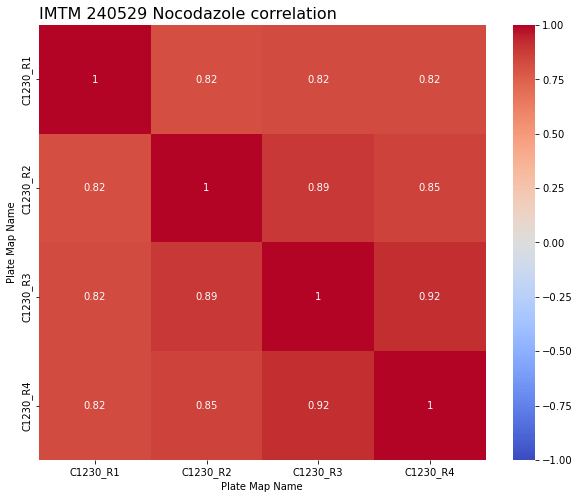

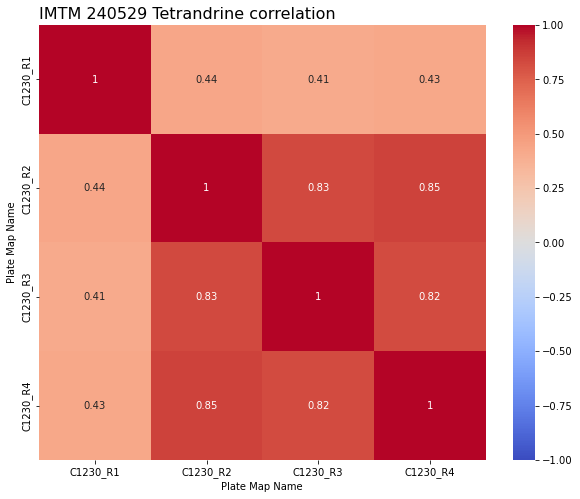

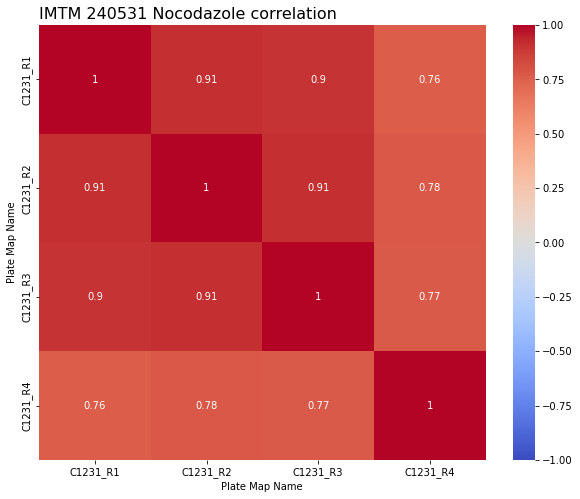

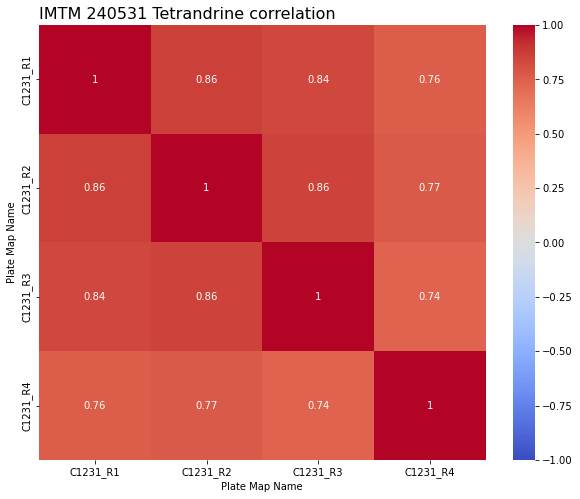

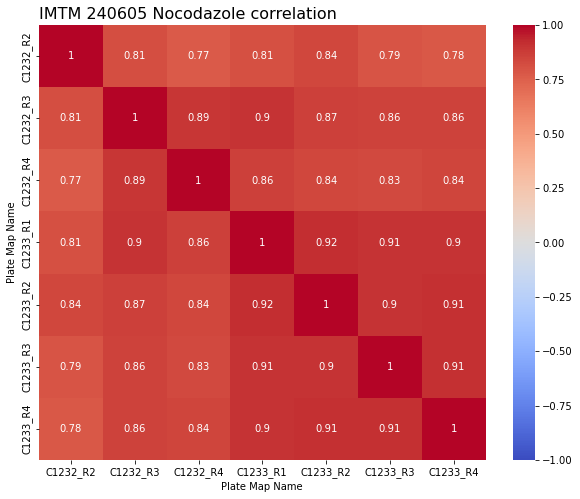

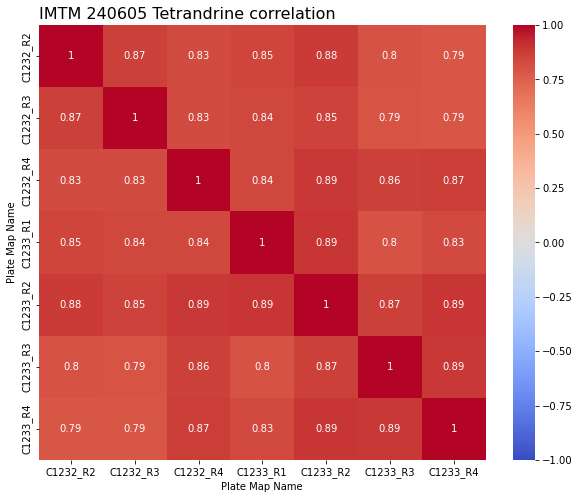

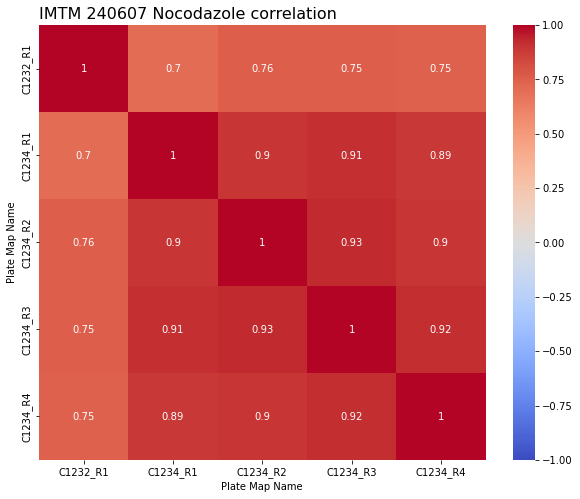

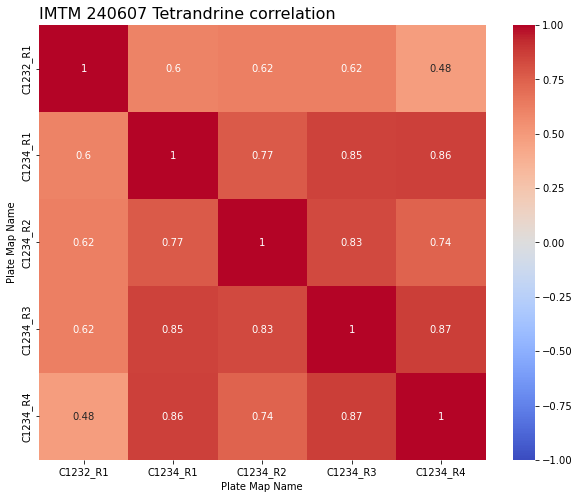

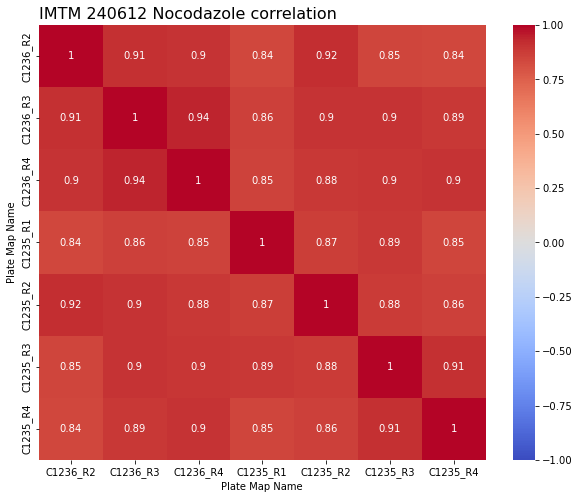

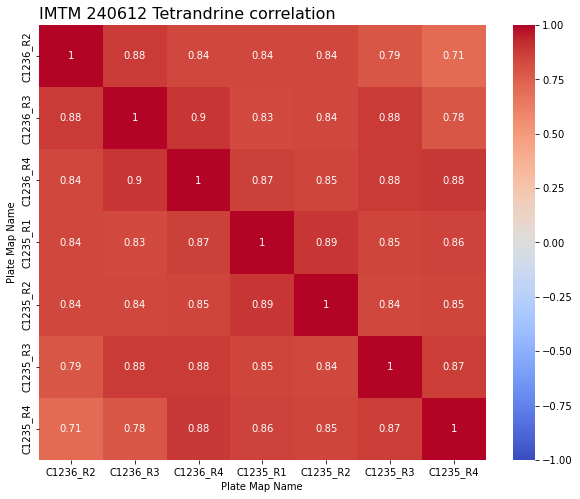

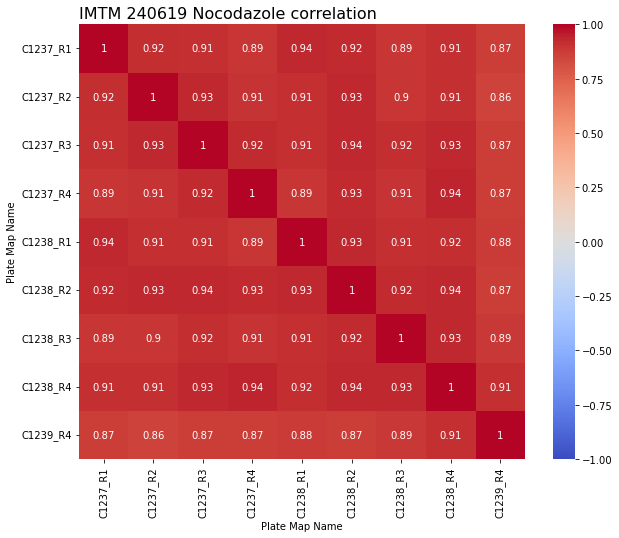

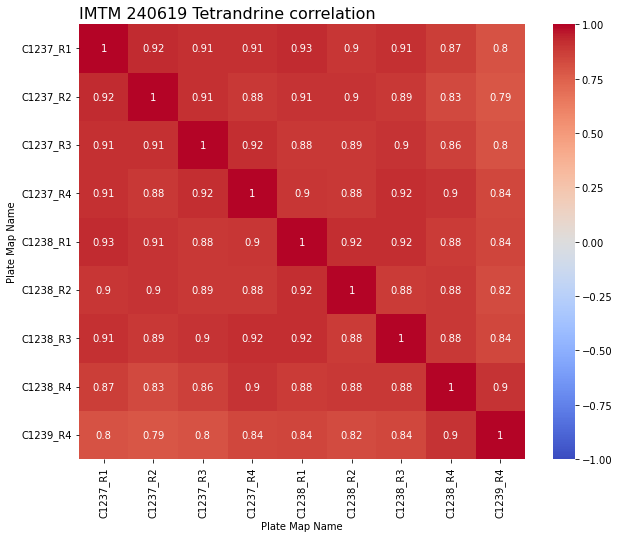

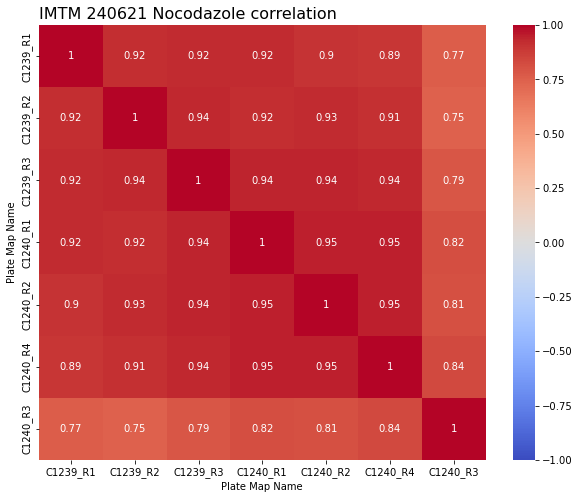

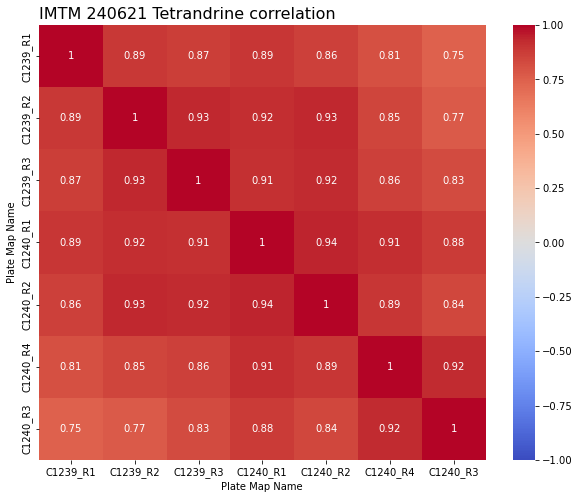

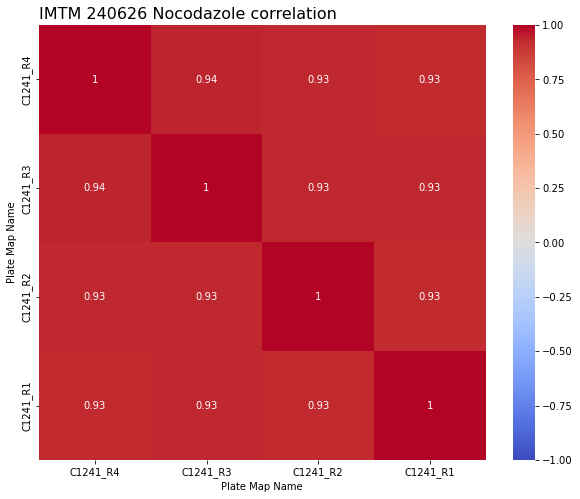

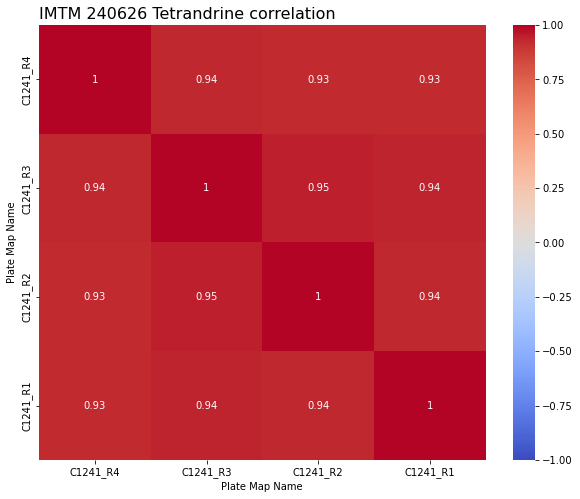

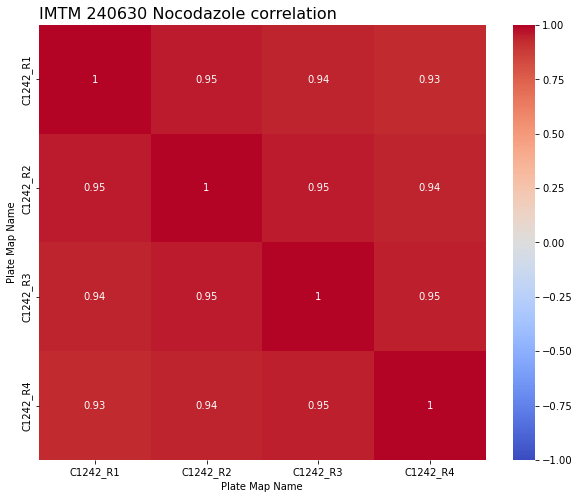

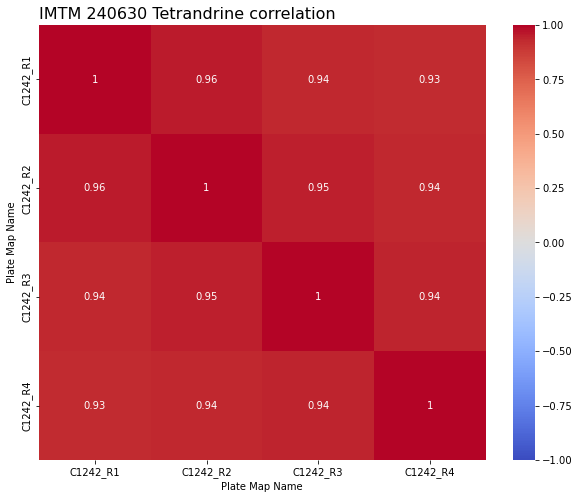

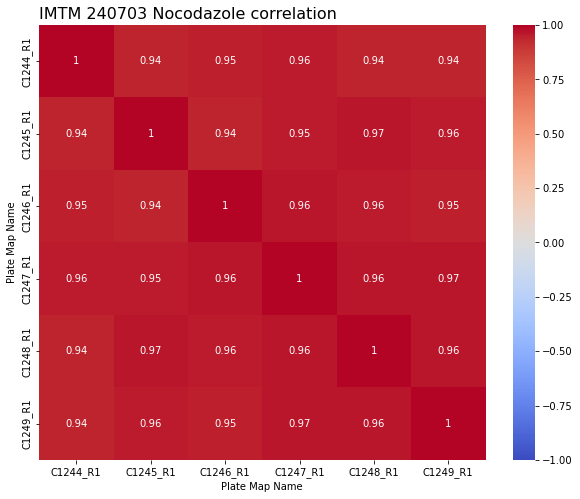

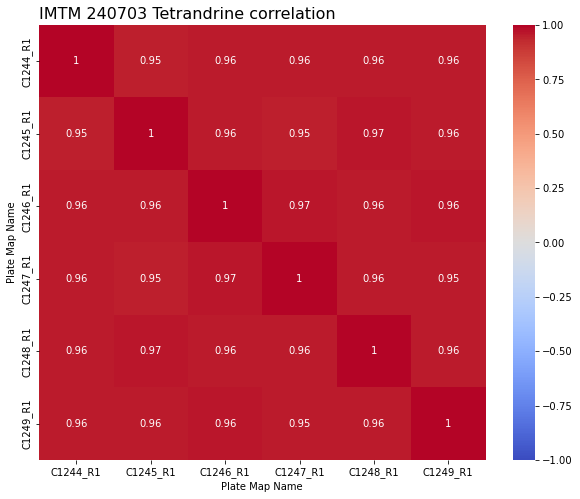

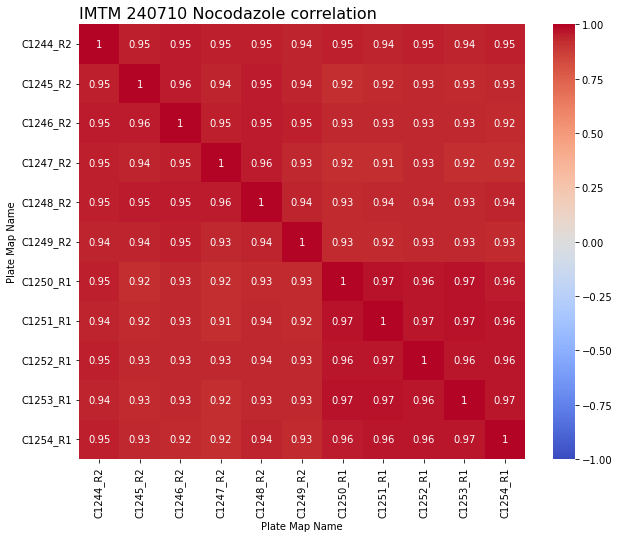

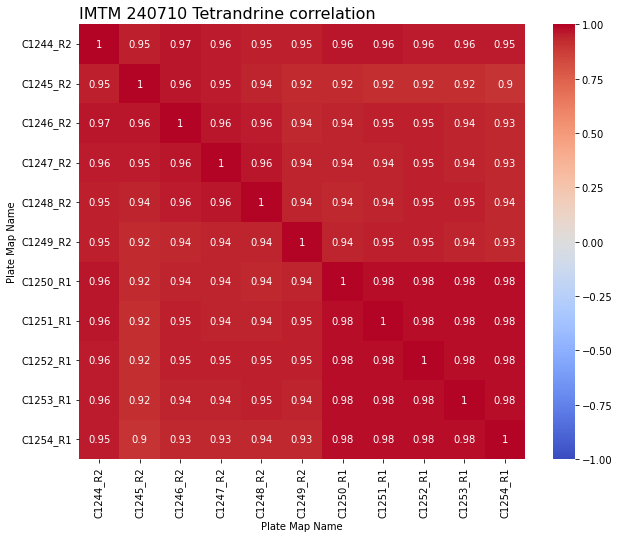

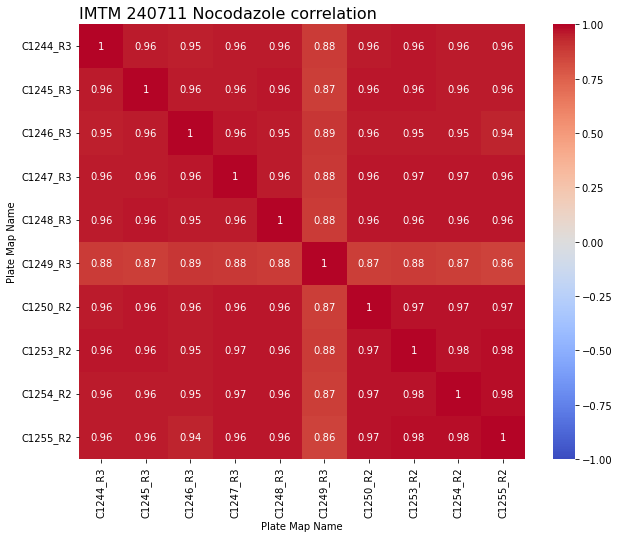

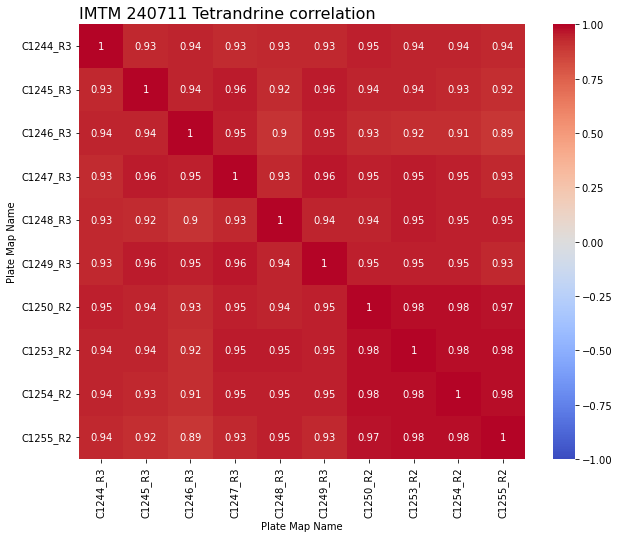

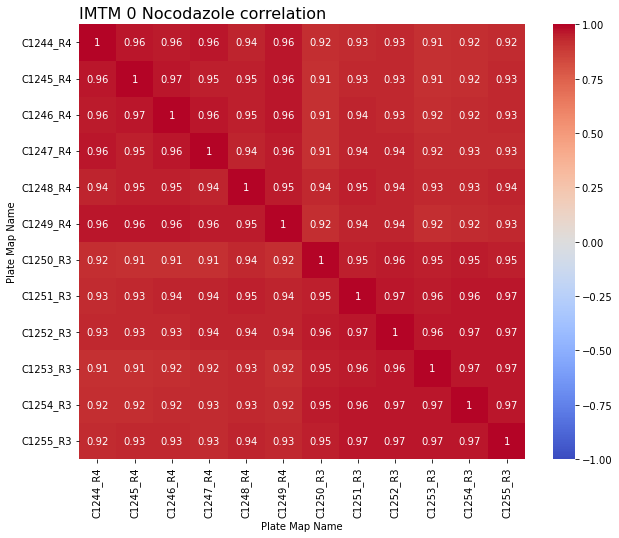

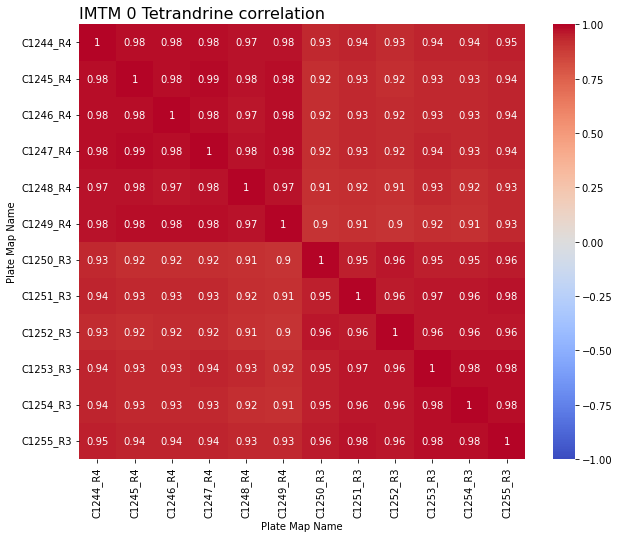

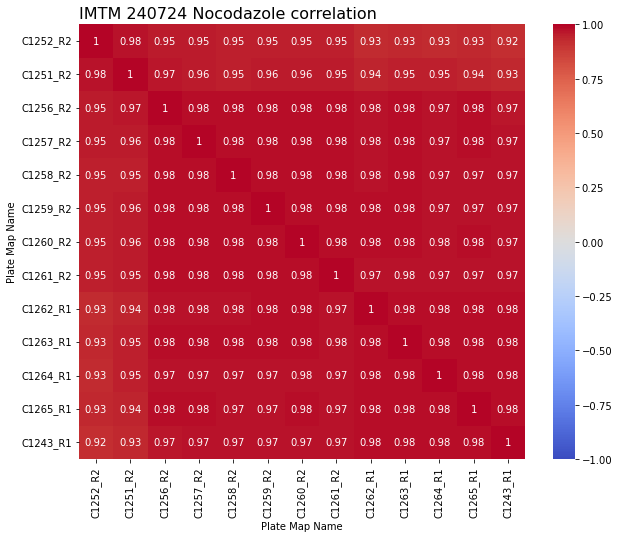

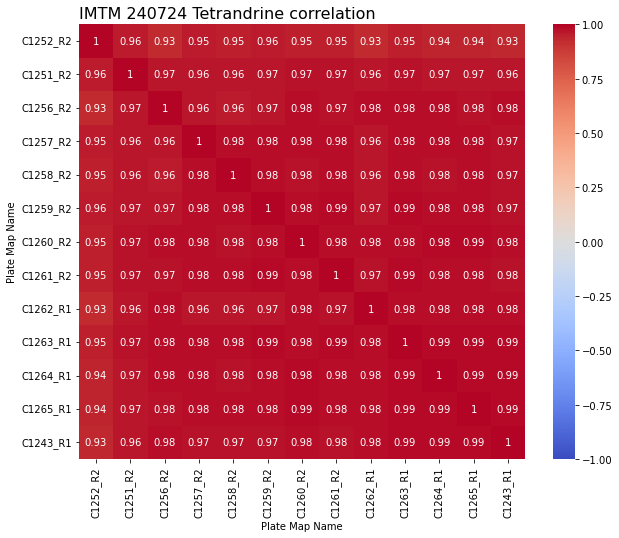

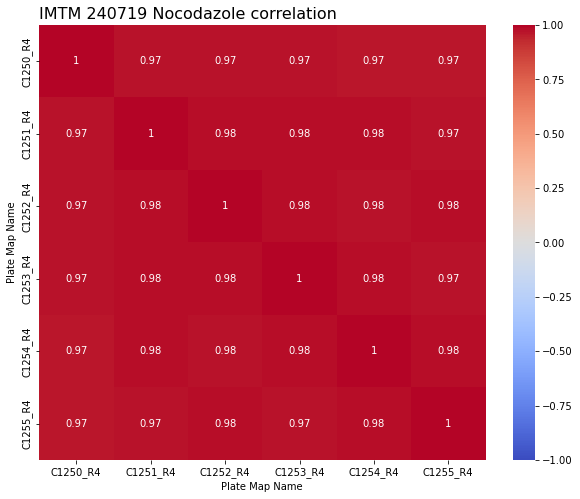

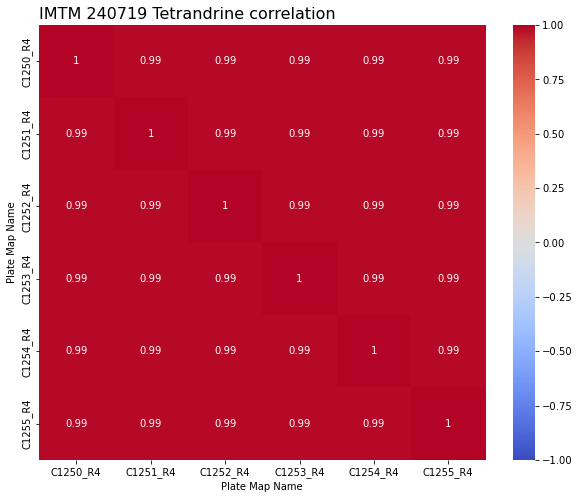

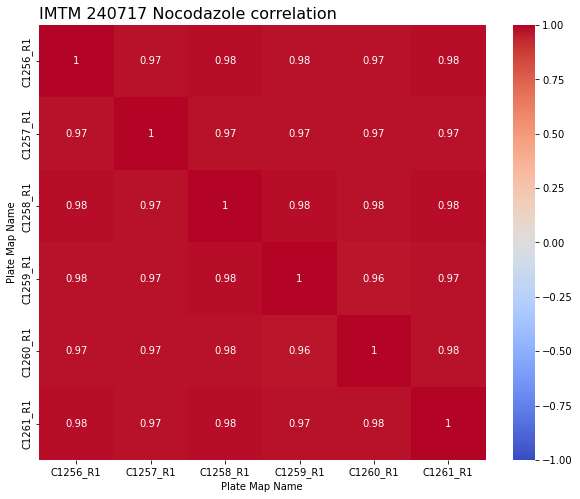

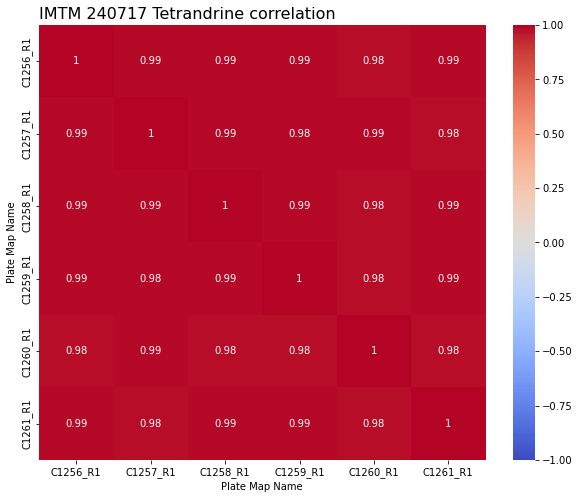

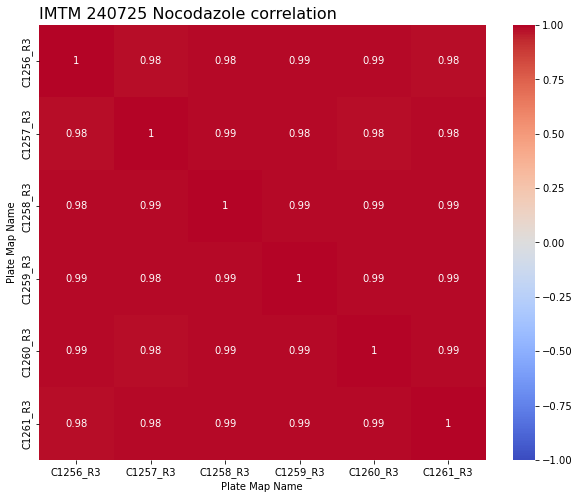

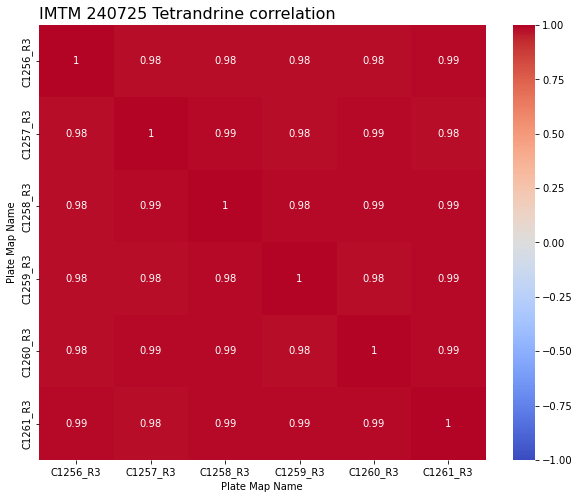

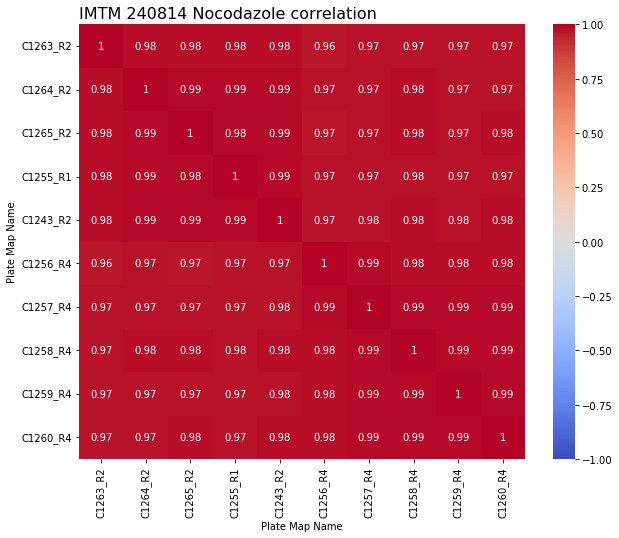

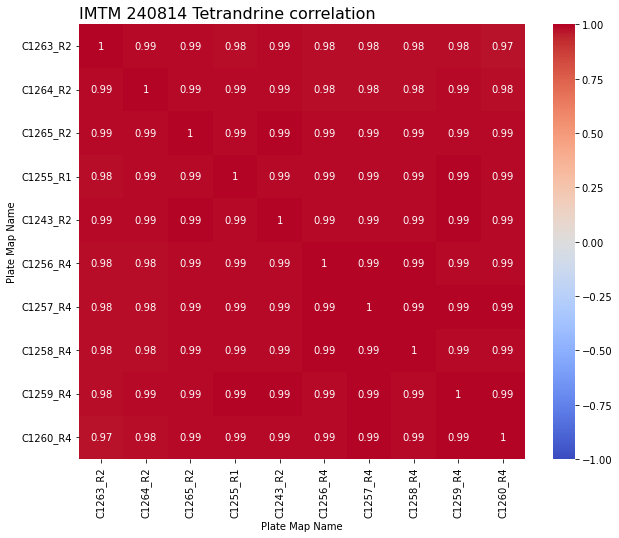

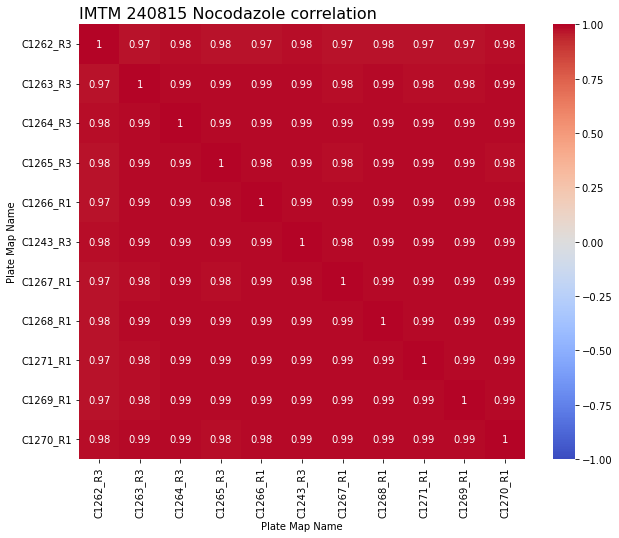

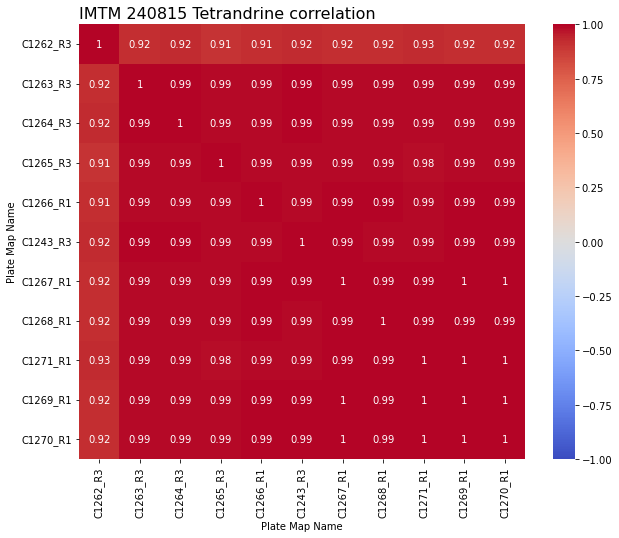

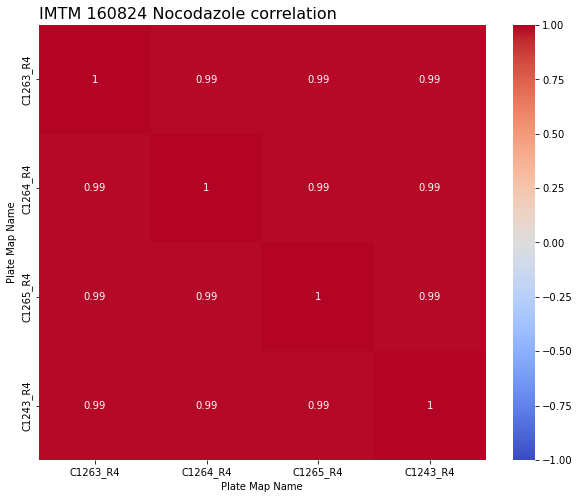

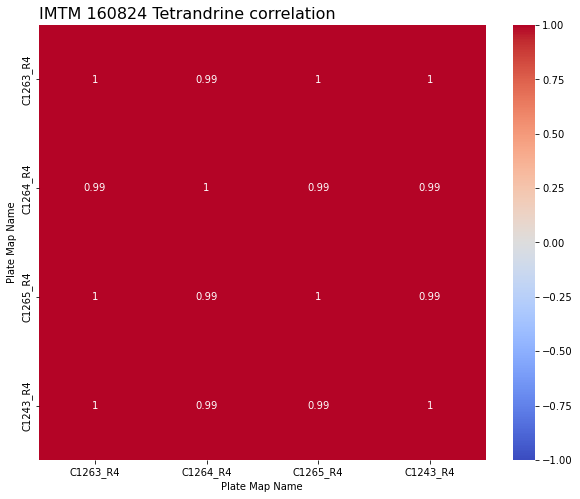

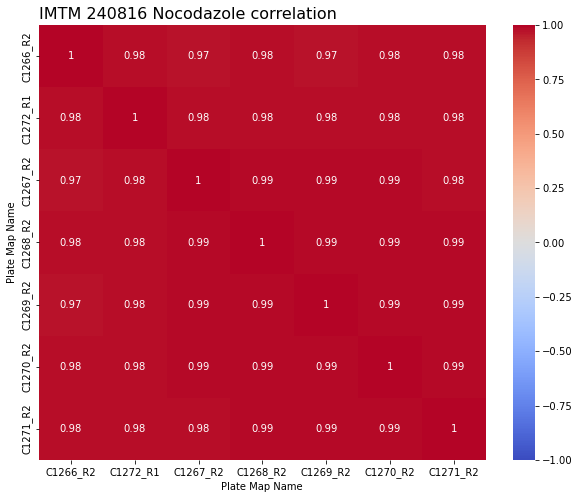

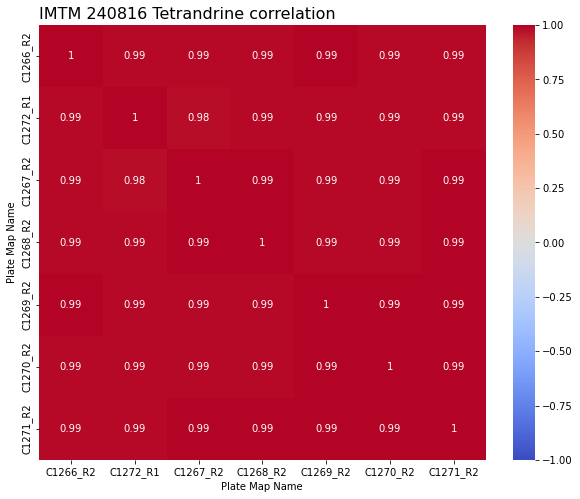

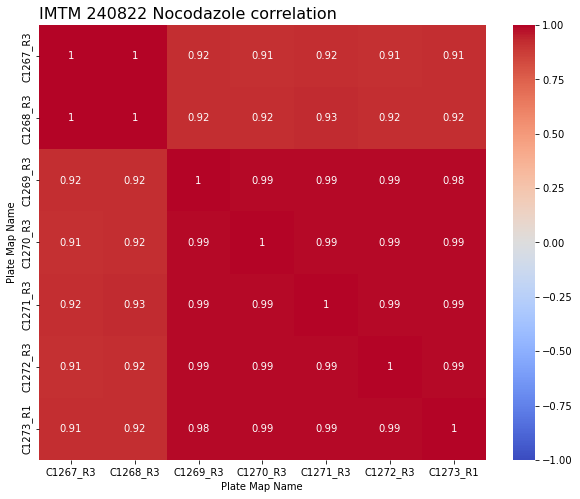

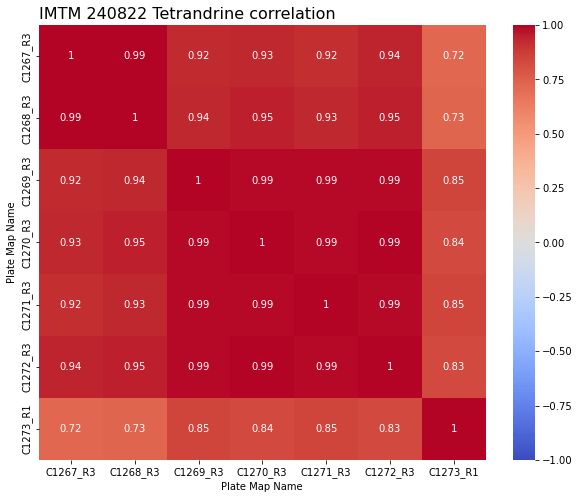

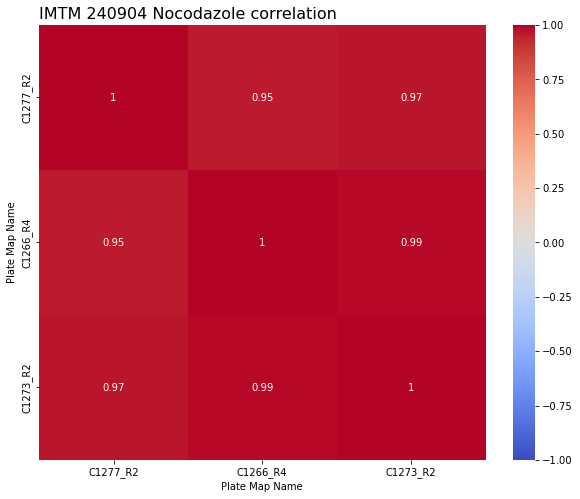

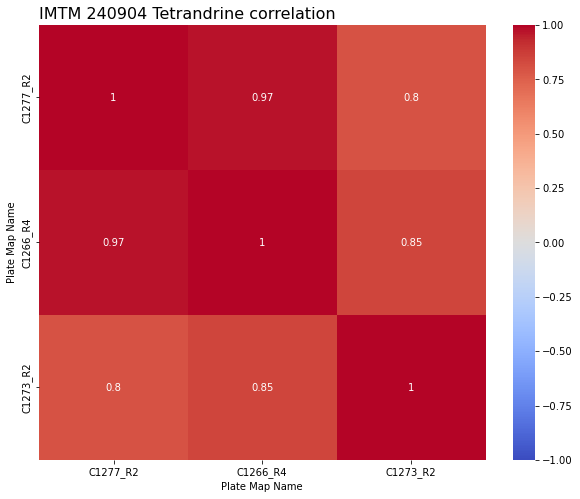

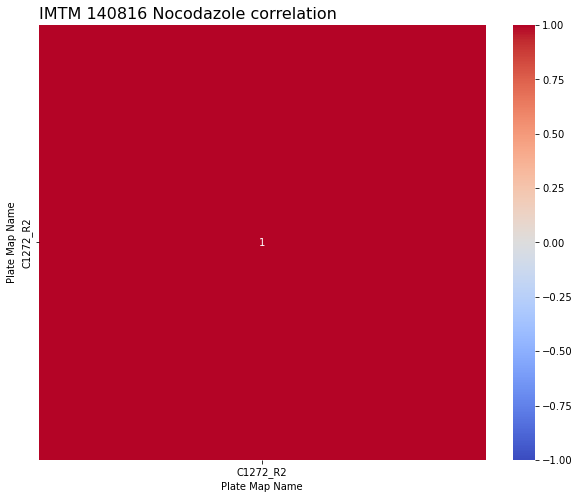

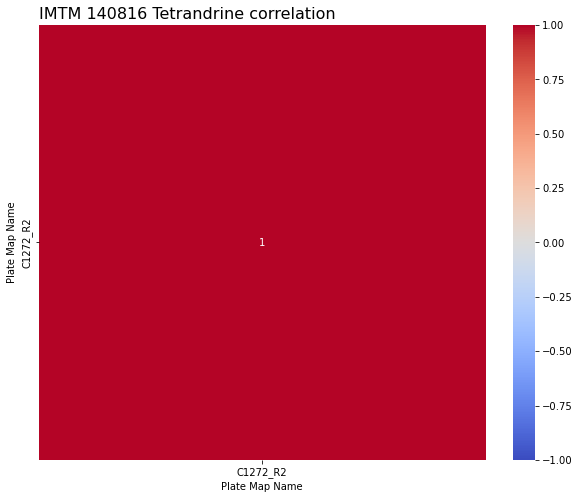

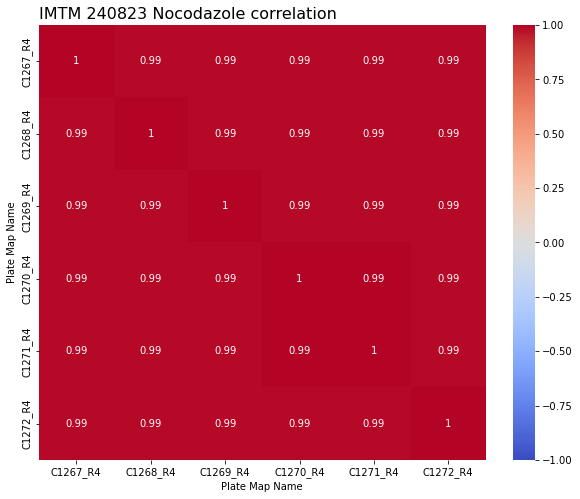

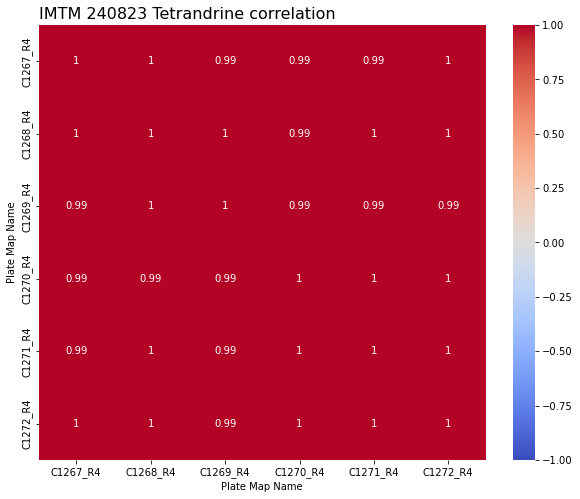

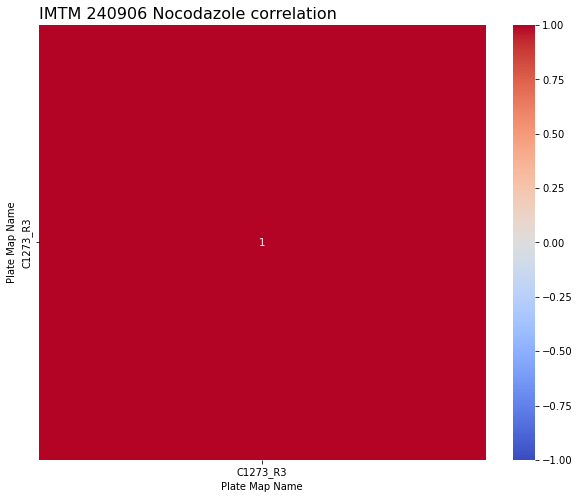

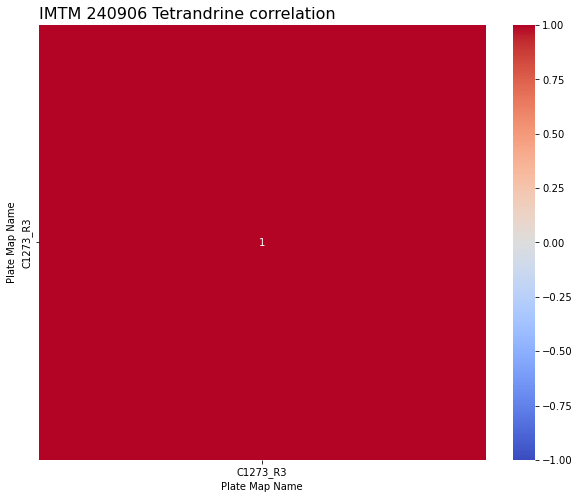

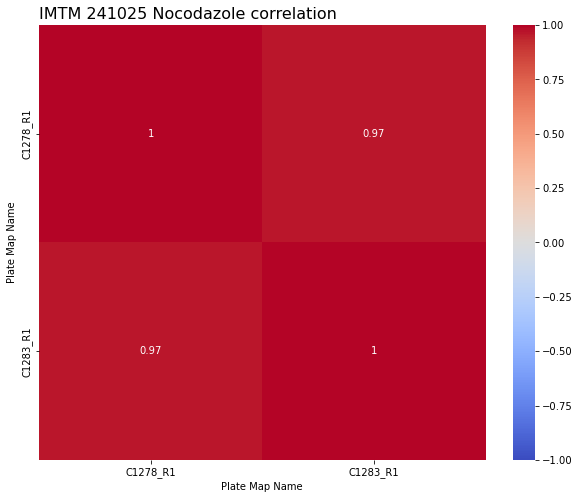

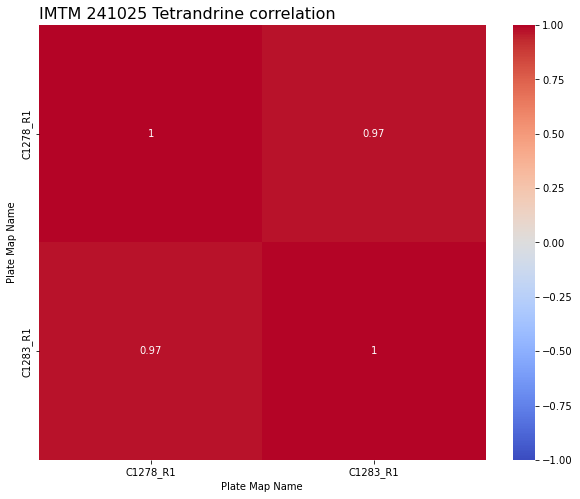

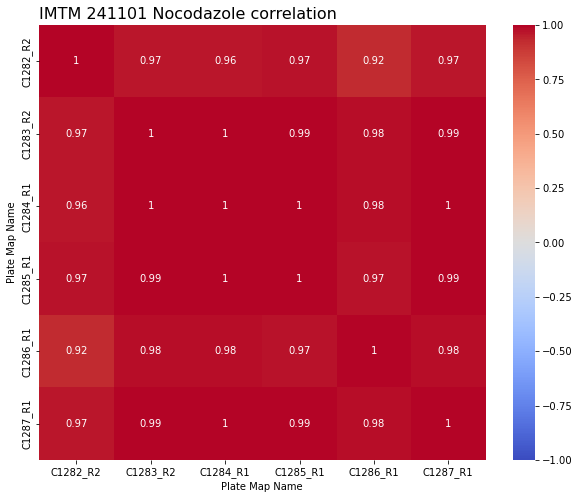

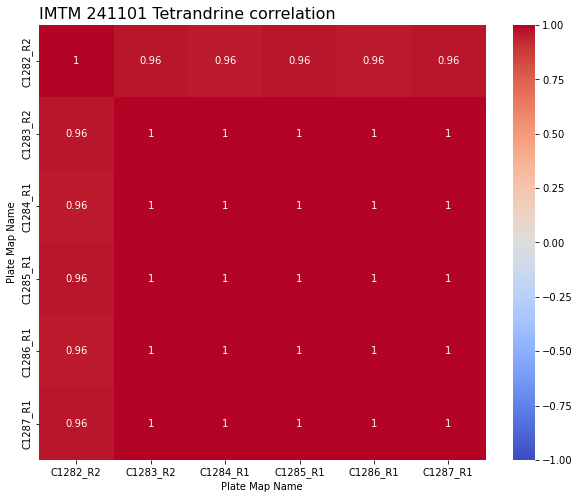

In [12]:
interplate_qc(IMTM_Data_aggregated, 'IMTM')

240505
Error: directory cannot be created
Error: directory cannot be created
240605
Error: directory cannot be created
Error: directory cannot be created
240614
Error: directory cannot be created
Error: directory cannot be created
240621
Error: directory cannot be created
Error: directory cannot be created
240626
Error: directory cannot be created
Error: directory cannot be created
240710
Error: directory cannot be created
Error: directory cannot be created
240717
Error: directory cannot be created
Error: directory cannot be created
240718
Error: directory cannot be created
Error: directory cannot be created
240904
Error: directory cannot be created
Error: directory cannot be created
240906
Error: directory cannot be created
Error: directory cannot be created
240911
Error: directory cannot be created


<ipython-input-11-44ab5d09d022>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Error: directory cannot be created
241002
Error: directory cannot be created
Error: directory cannot be created
241018
Error: directory cannot be created
Error: directory cannot be created
241106
Error: directory cannot be created
Error: directory cannot be created
241113
Error: directory cannot be created
Error: directory cannot be created


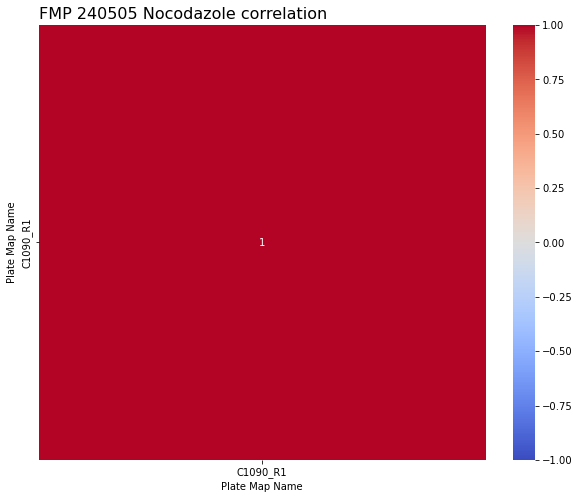

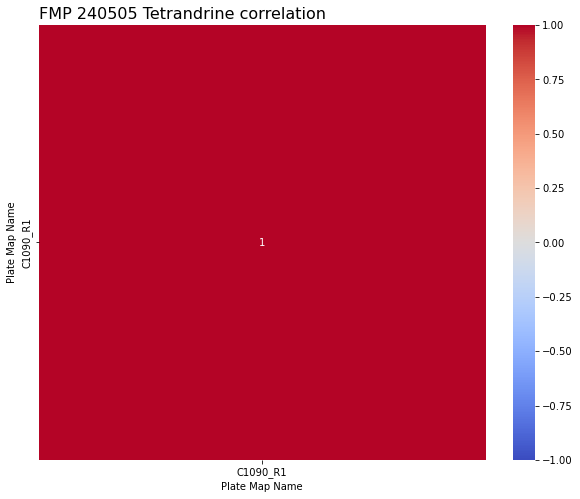

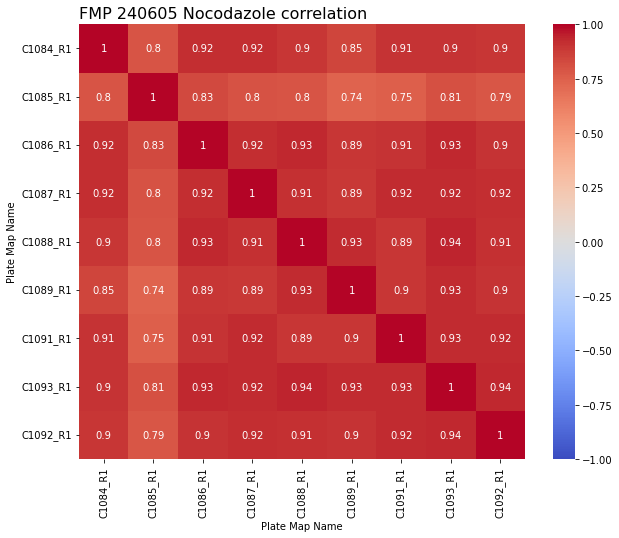

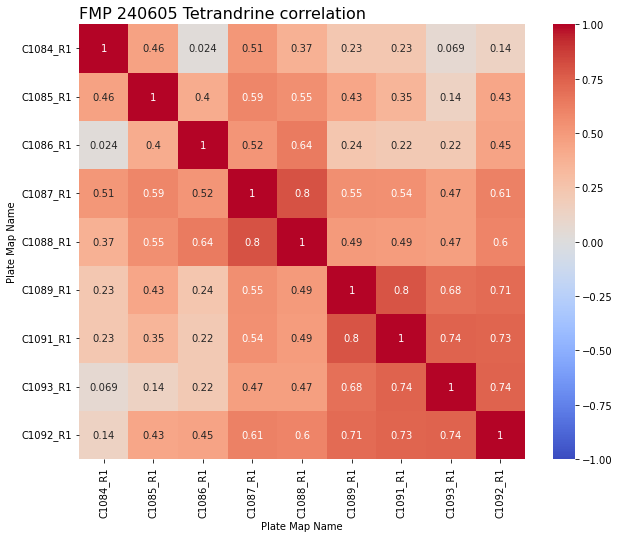

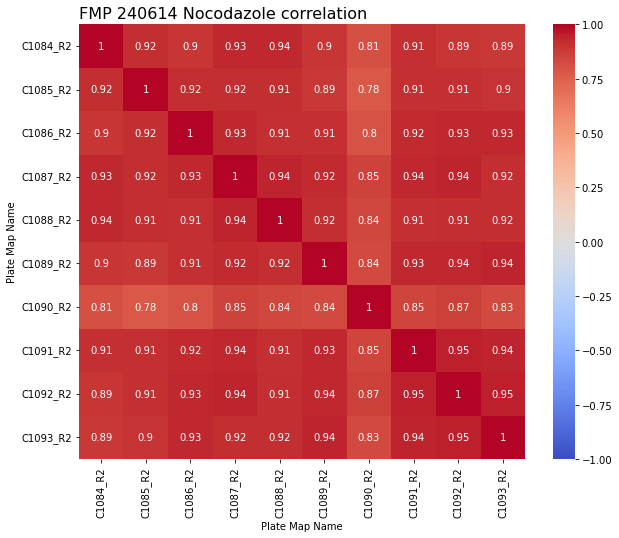

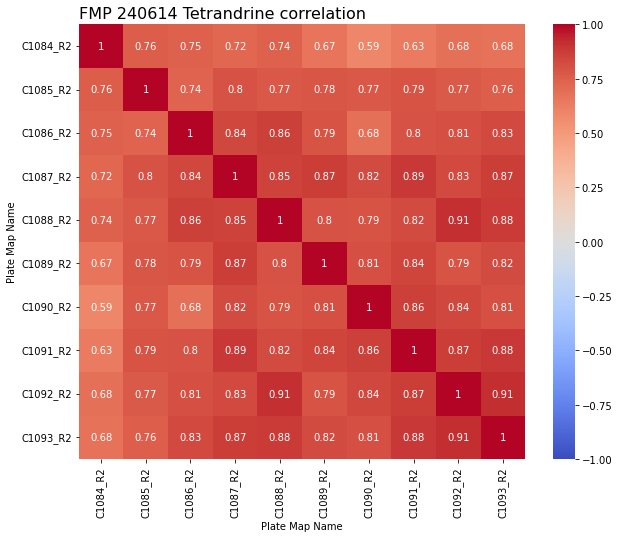

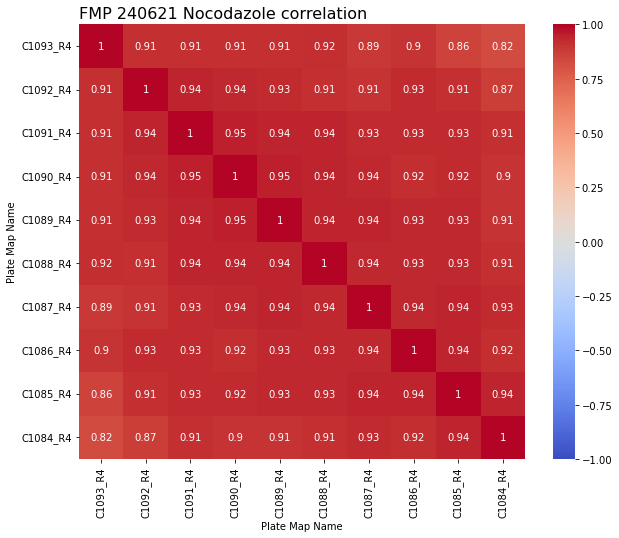

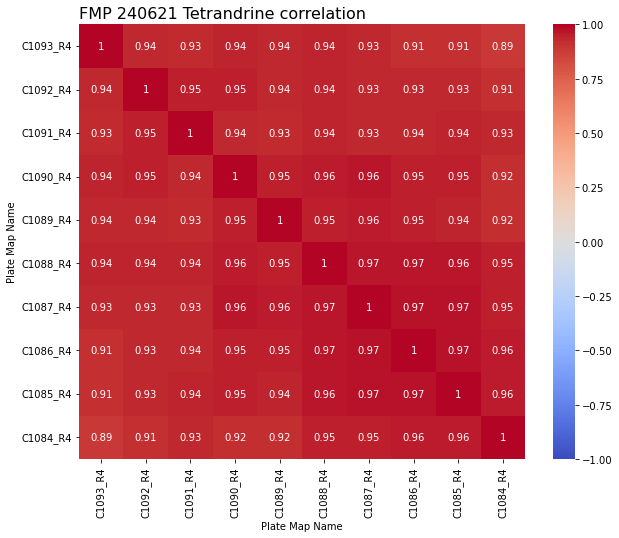

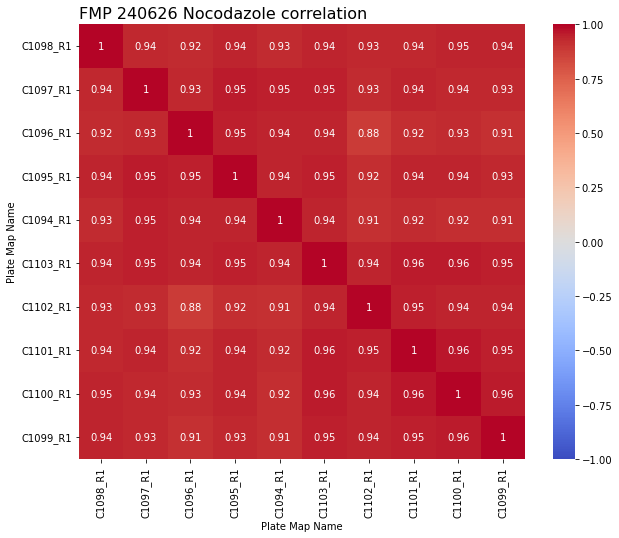

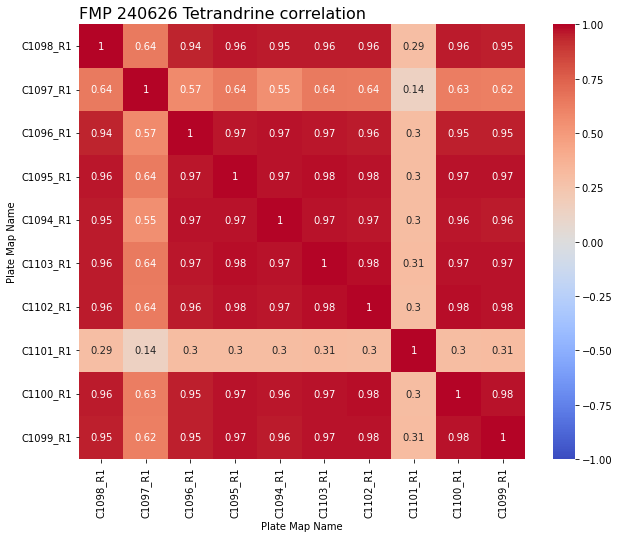

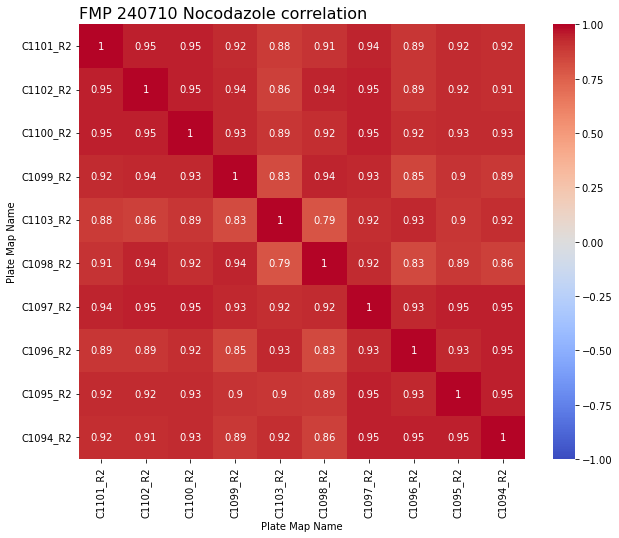

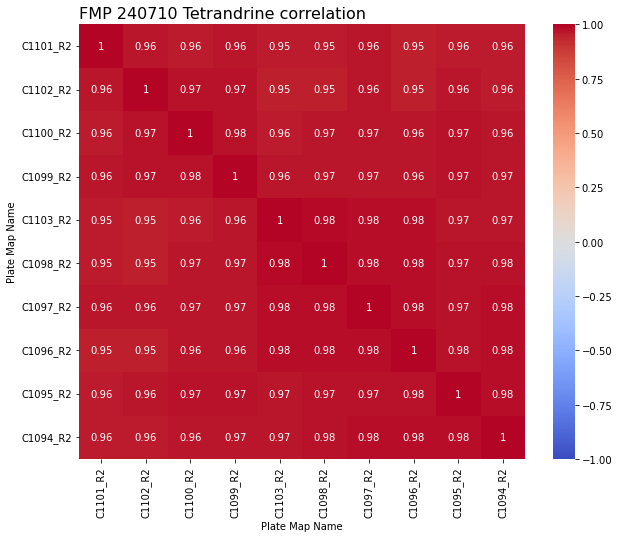

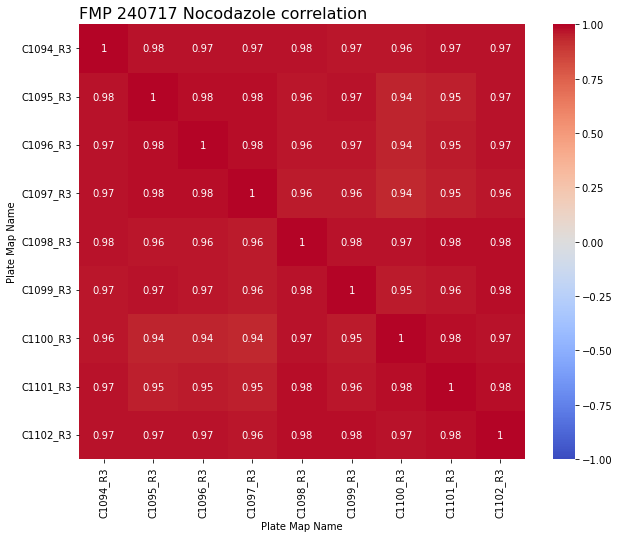

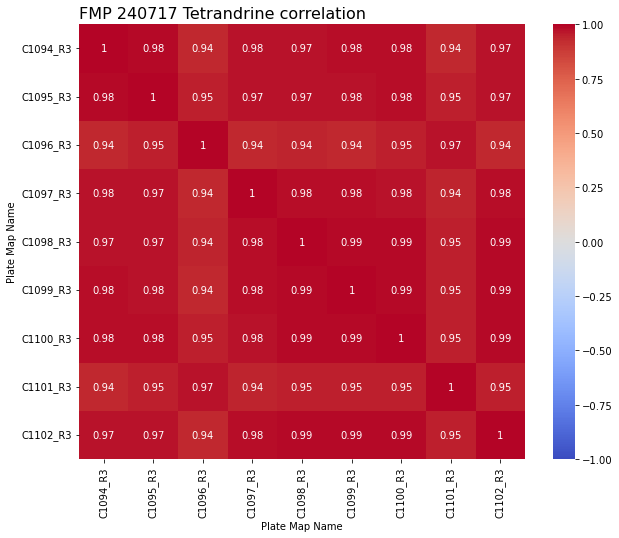

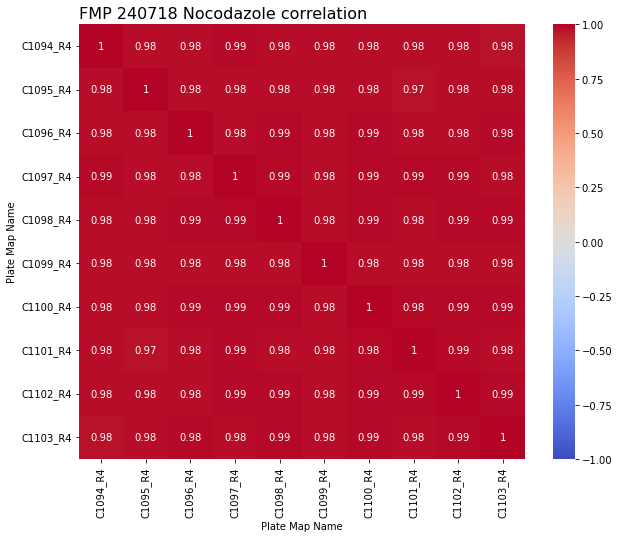

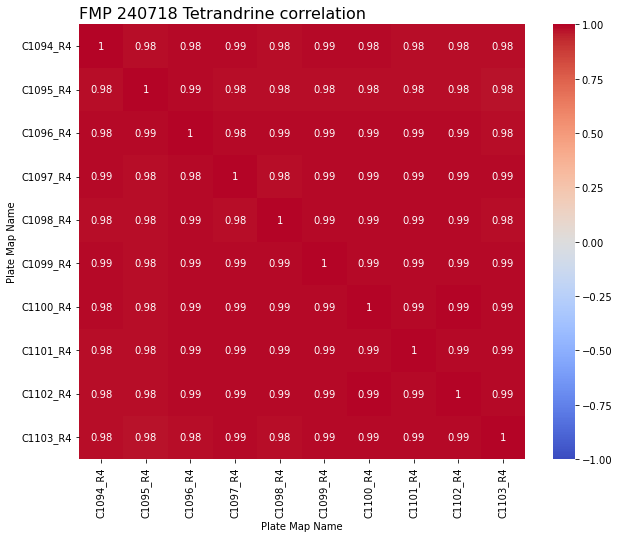

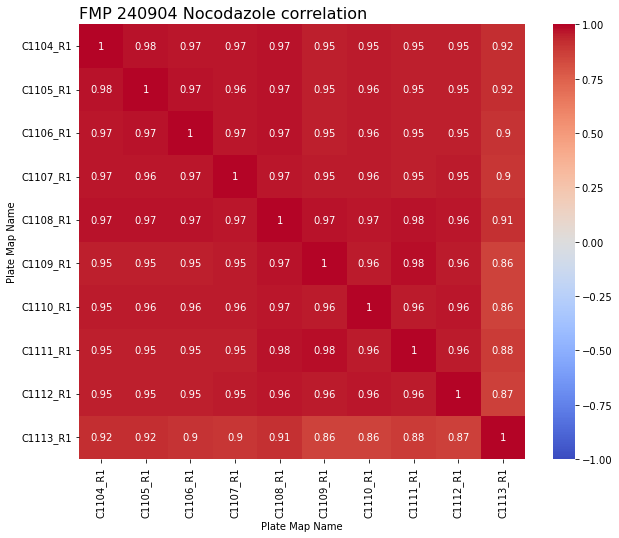

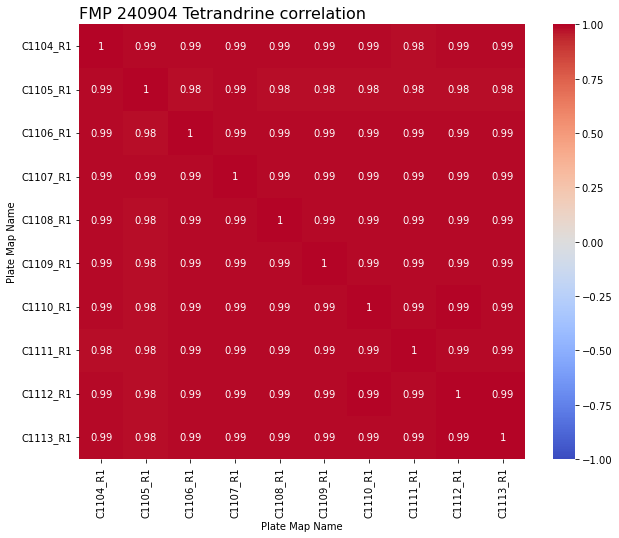

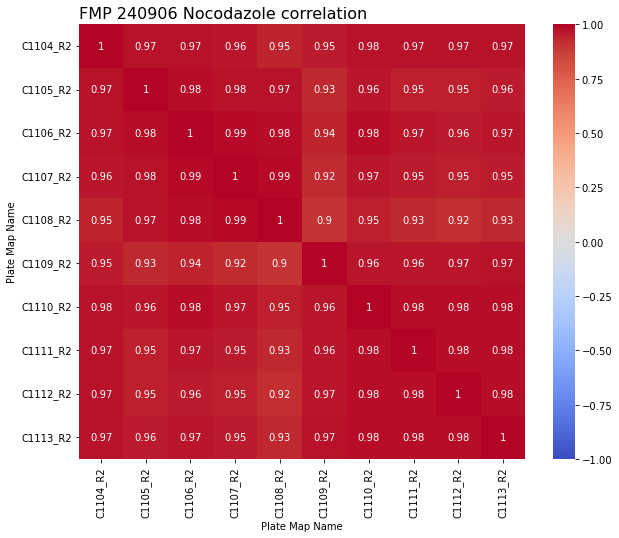

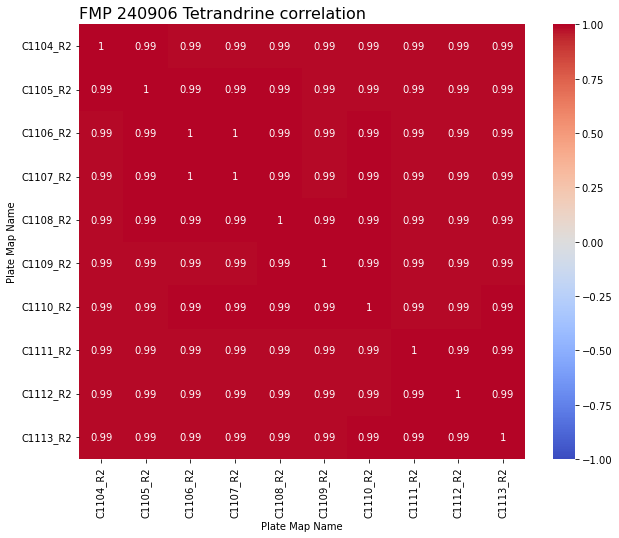

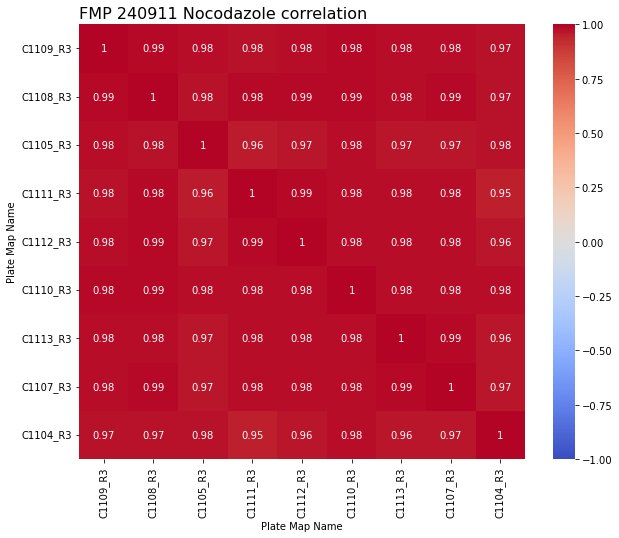

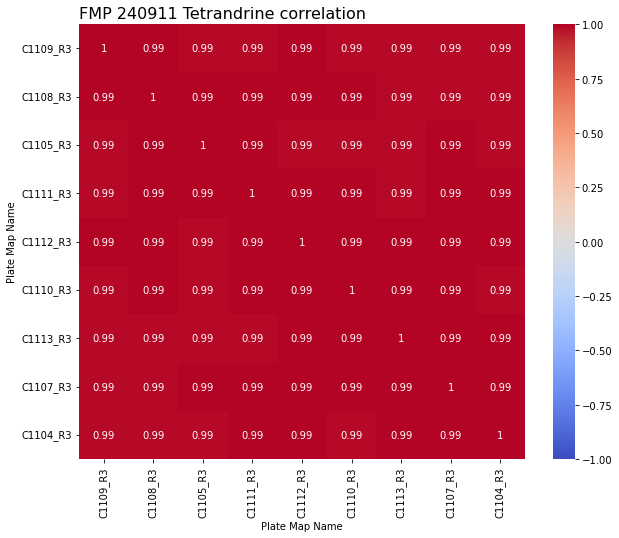

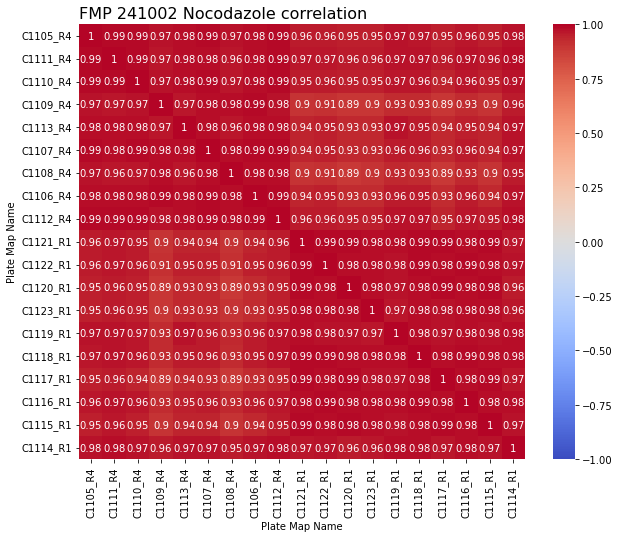

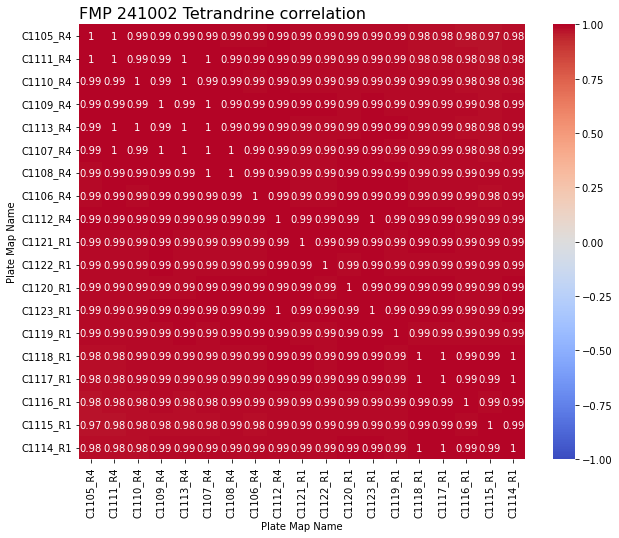

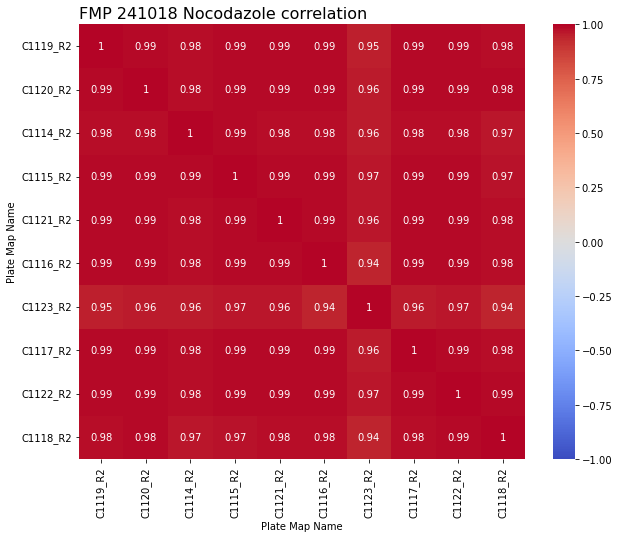

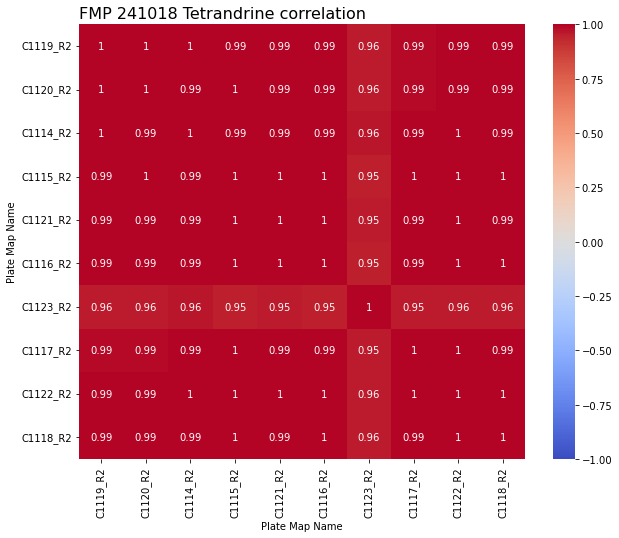

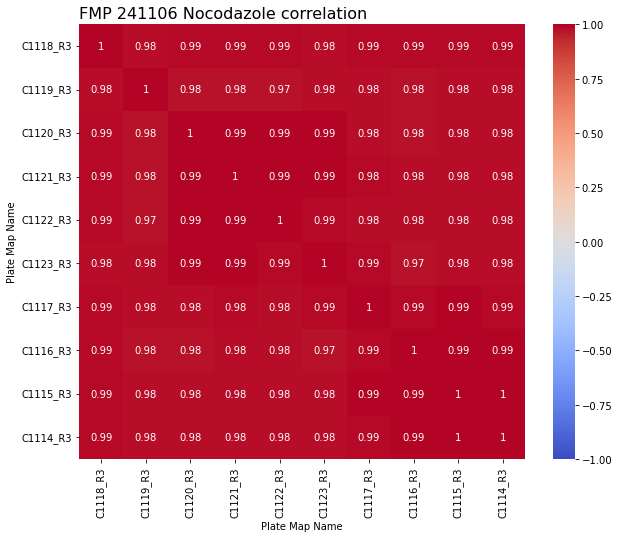

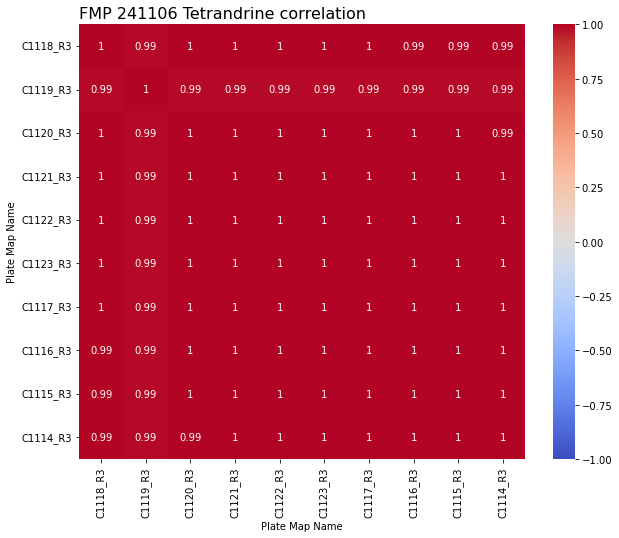

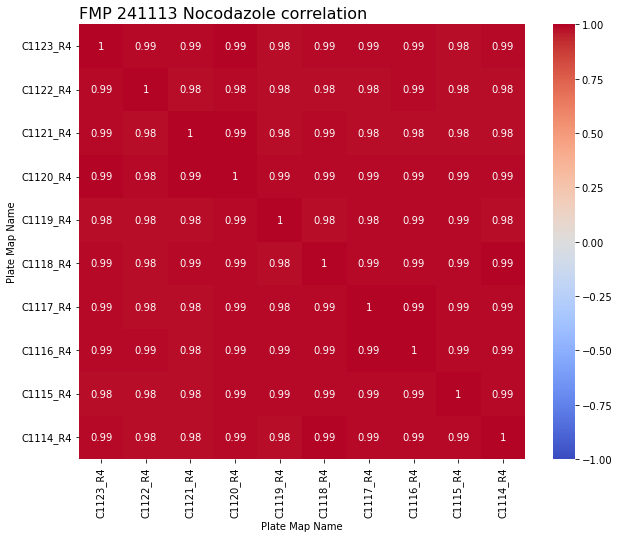

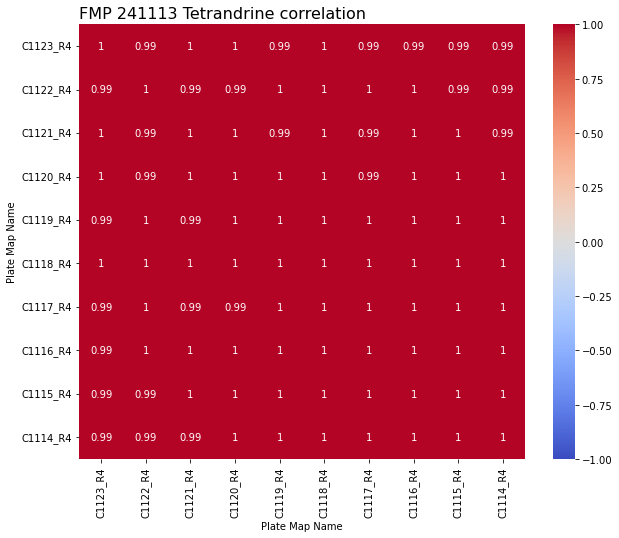

In [13]:
interplate_qc(FMP_Data_aggregated, 'FMP')

240613
Error: directory cannot be created
Error: directory cannot be created
240614
Error: directory cannot be created
Error: directory cannot be created
240619
Error: directory cannot be created
Error: directory cannot be created
240621
Error: directory cannot be created
Error: directory cannot be created
240622
Error: directory cannot be created
Error: directory cannot be created
240626
Error: directory cannot be created
Error: directory cannot be created
240627
Error: directory cannot be created
Error: directory cannot be created
240628
Error: directory cannot be created
Error: directory cannot be created
240701
Error: directory cannot be created
Error: directory cannot be created
240703
Error: directory cannot be created
Error: directory cannot be created
0
Error: directory cannot be created


<ipython-input-11-44ab5d09d022>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Error: directory cannot be created
240704
Error: directory cannot be created
Error: directory cannot be created
240710
Error: directory cannot be created
Error: directory cannot be created
240711
Error: directory cannot be created
Error: directory cannot be created
240718
Error: directory cannot be created
Error: directory cannot be created
240719
Error: directory cannot be created
Error: directory cannot be created
240724
Error: directory cannot be created
Error: directory cannot be created
240726
Error: directory cannot be created
Error: directory cannot be created
240730
Error: directory cannot be created
Error: directory cannot be created
240912
Error: directory cannot be created
Error: directory cannot be created
240918
Error: directory cannot be created
Error: directory cannot be created
240920
Error: directory cannot be created
Error: directory cannot be created
241016
Error: directory cannot be created
Error: directory cannot be created
241018
Error: directory cannot be created

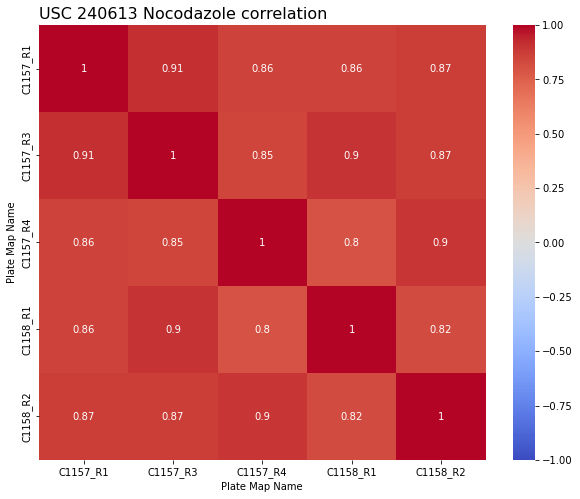

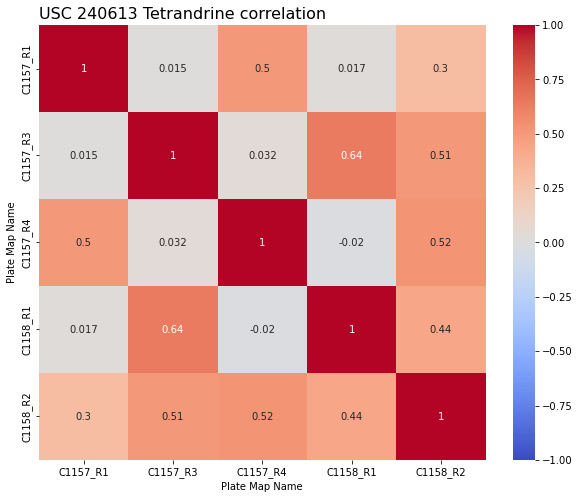

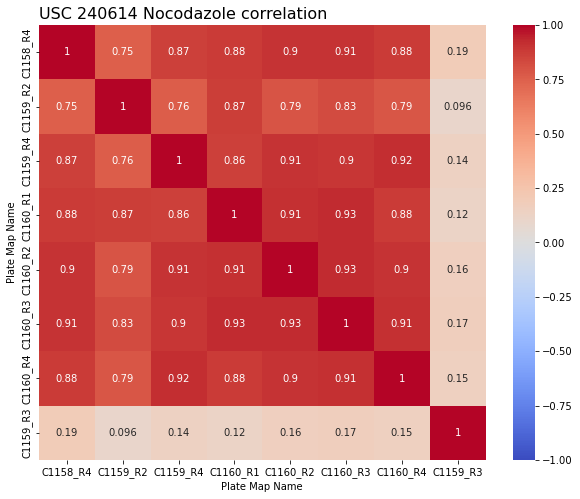

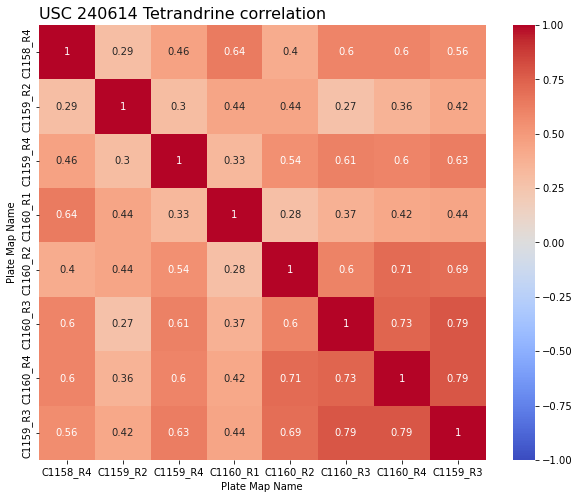

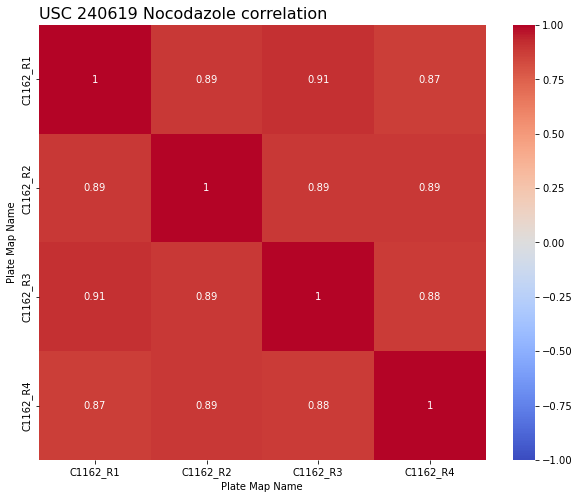

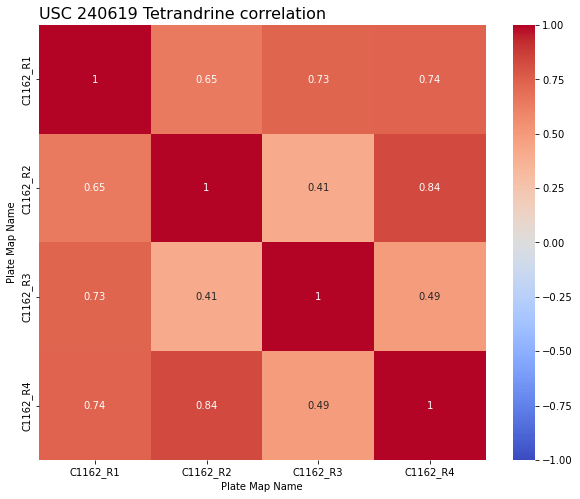

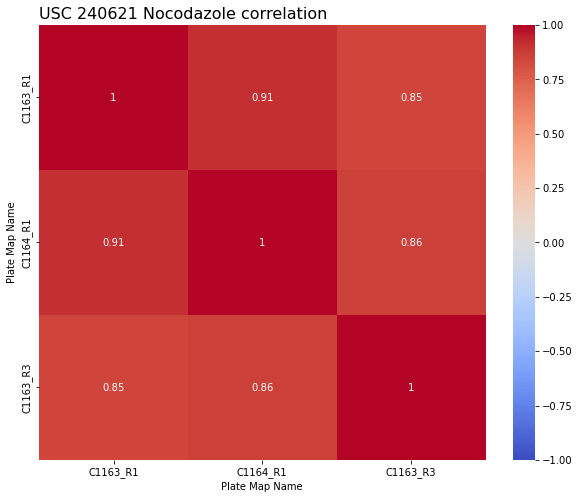

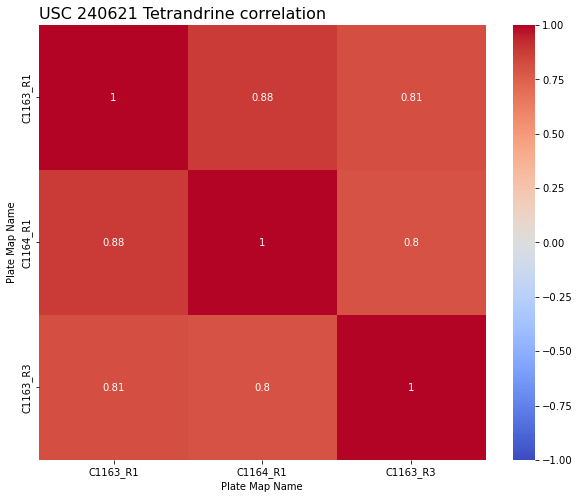

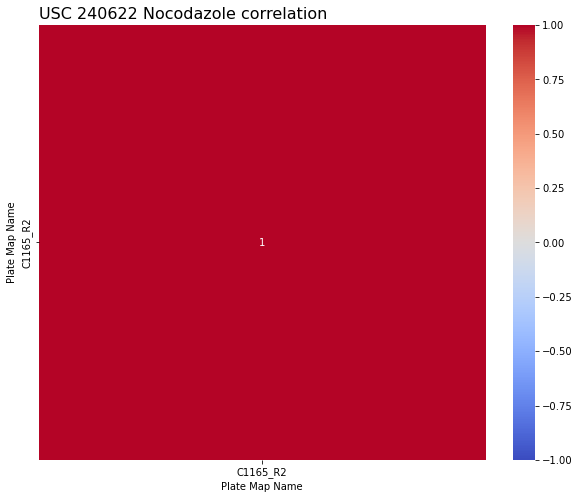

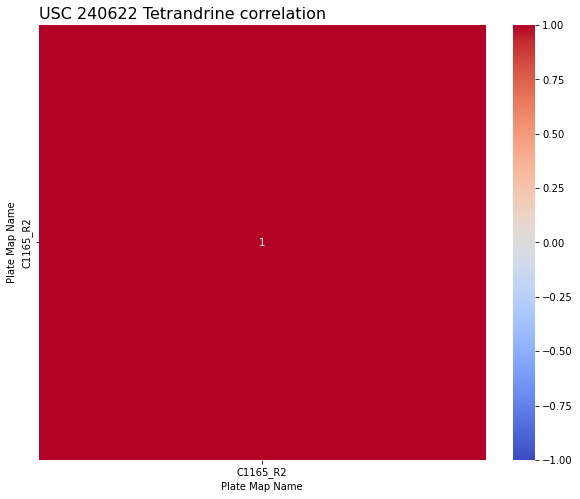

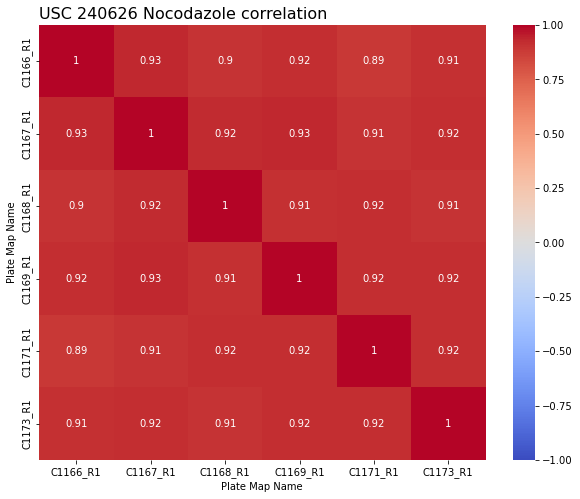

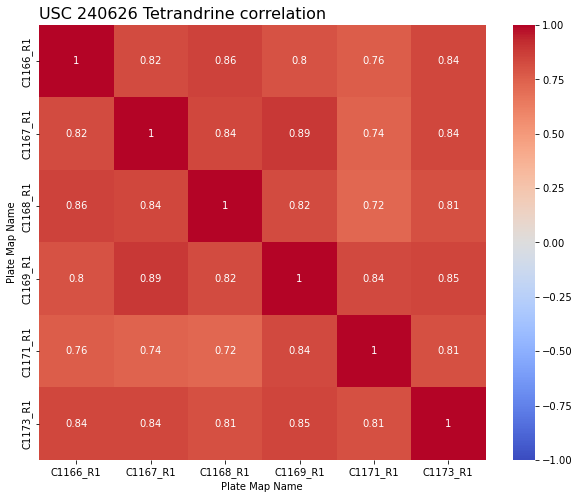

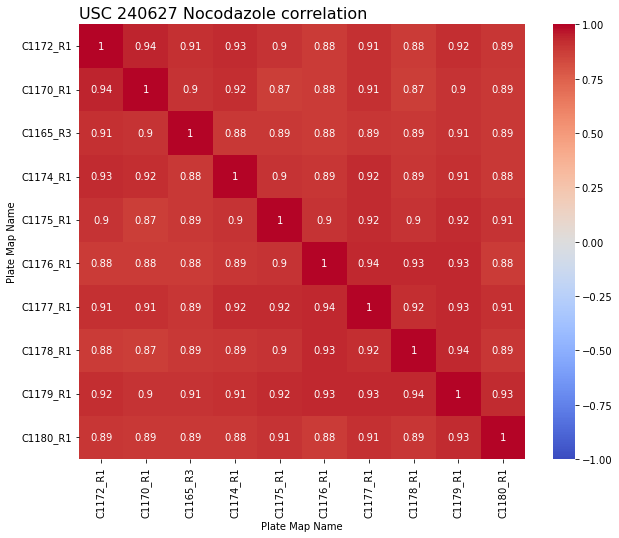

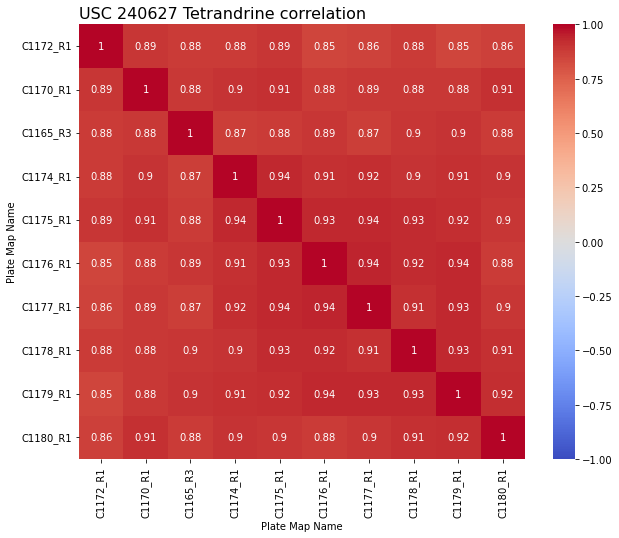

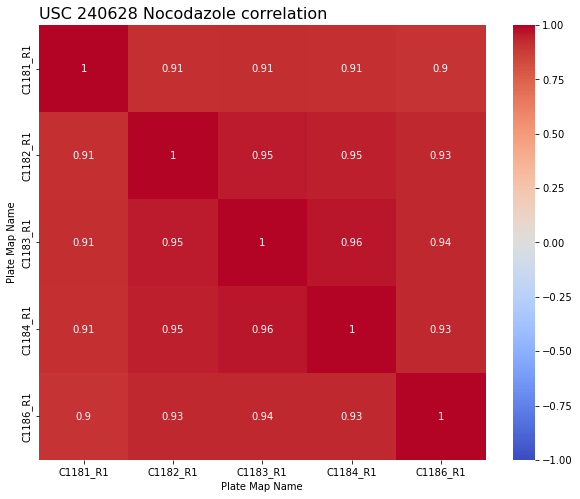

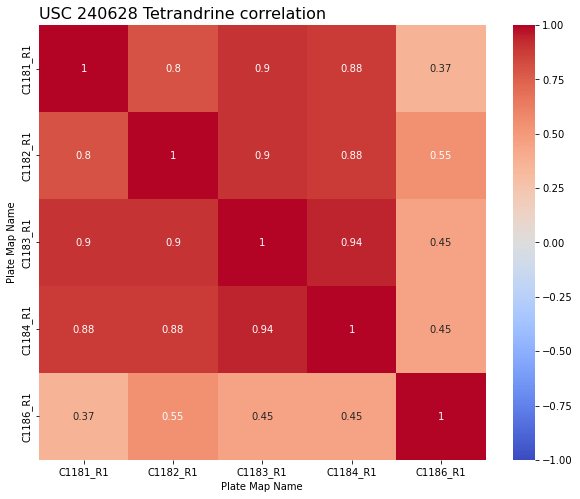

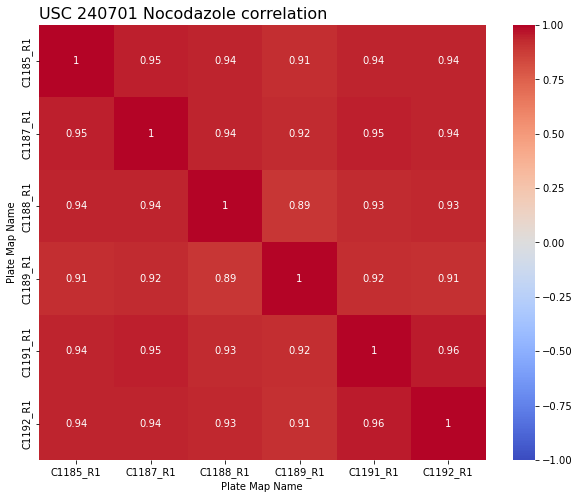

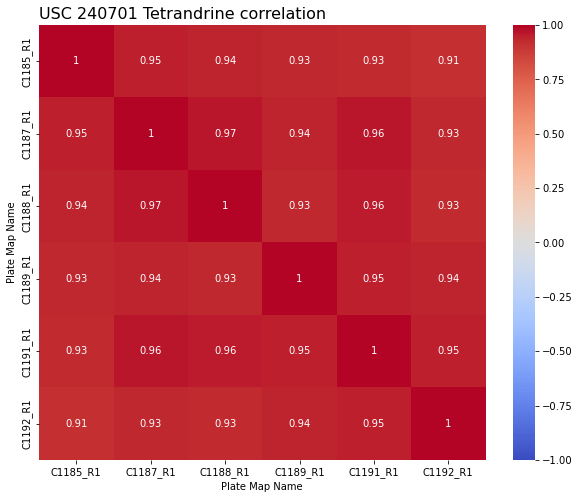

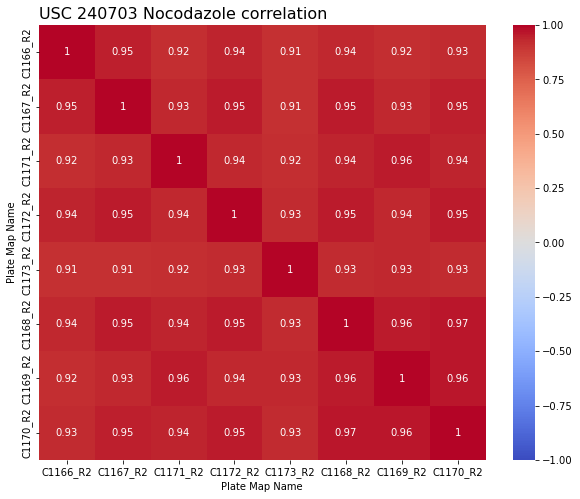

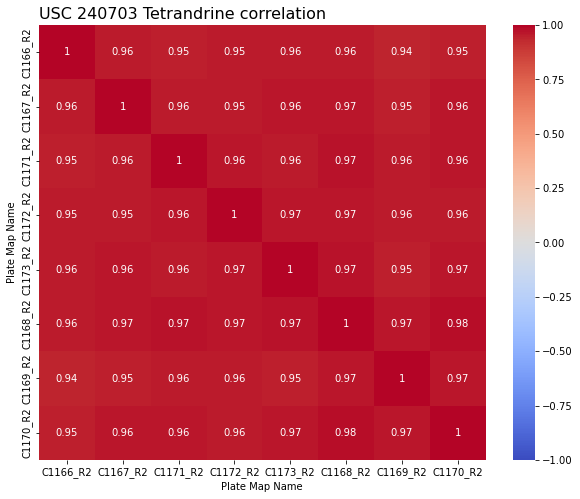

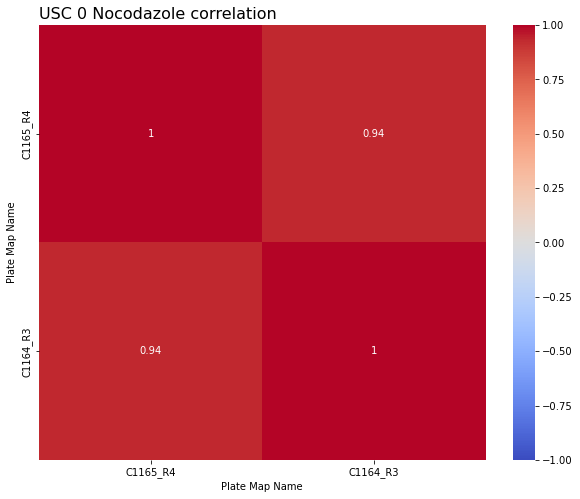

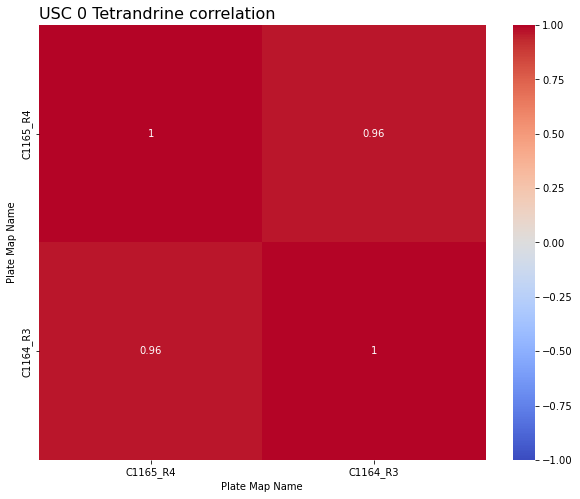

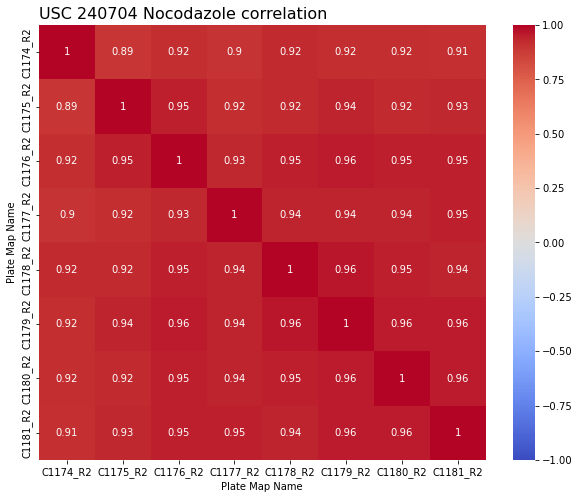

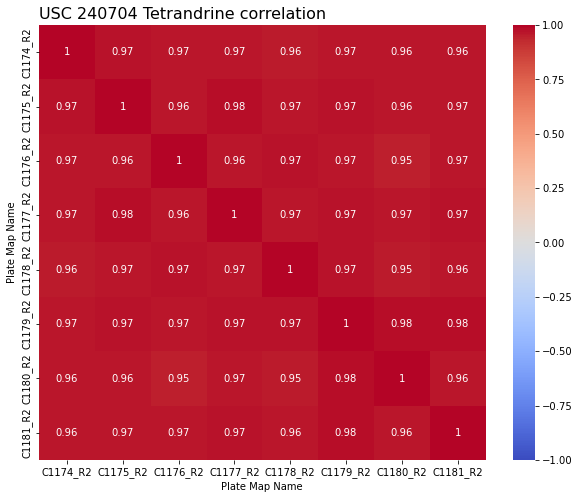

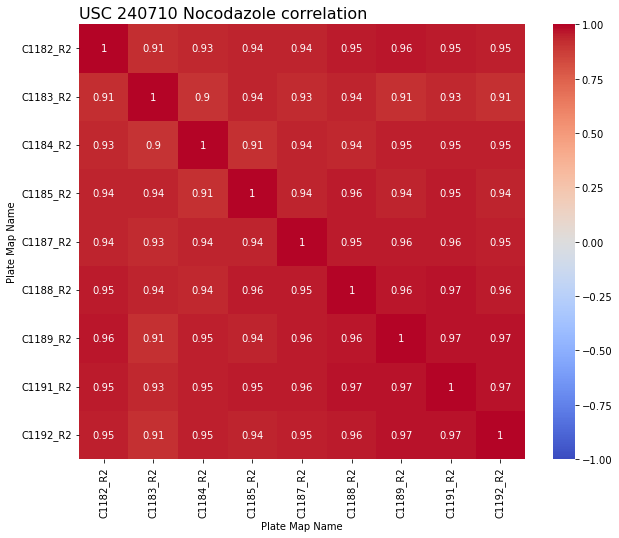

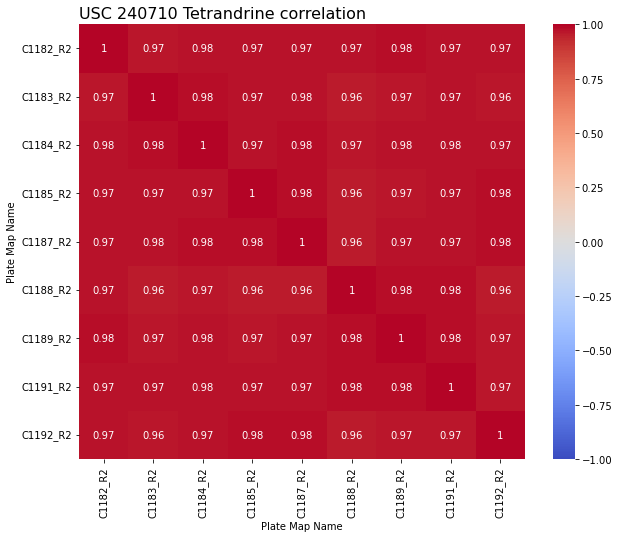

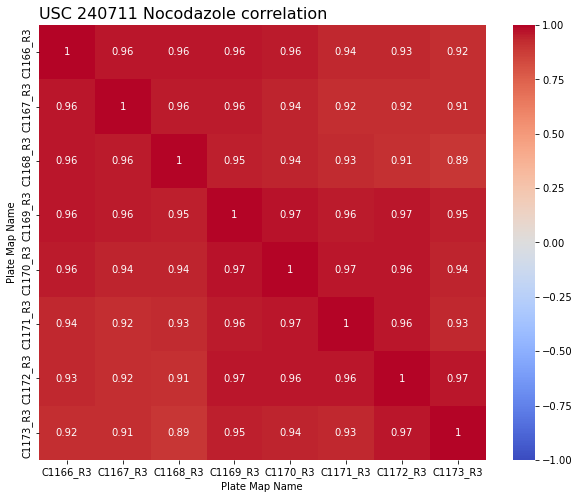

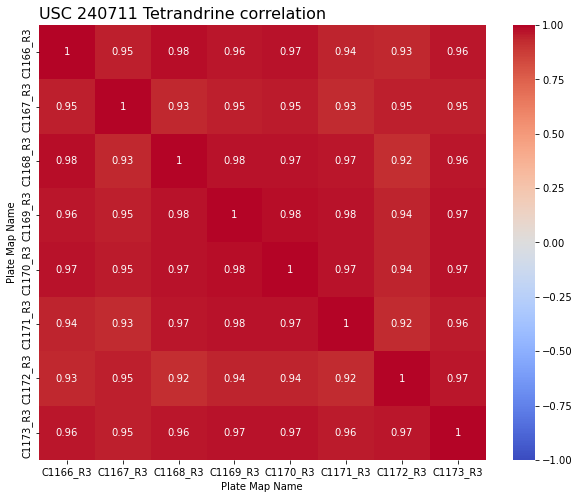

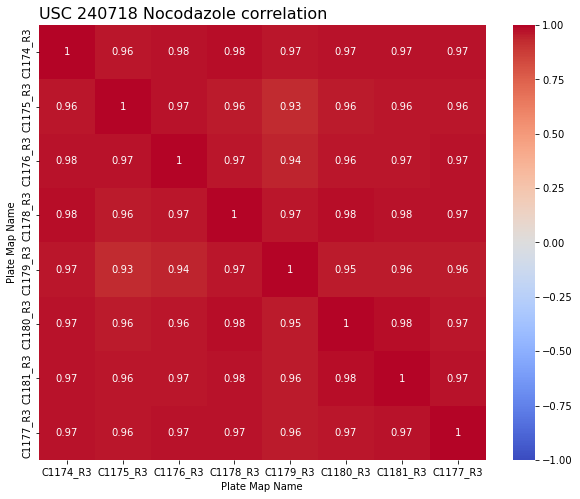

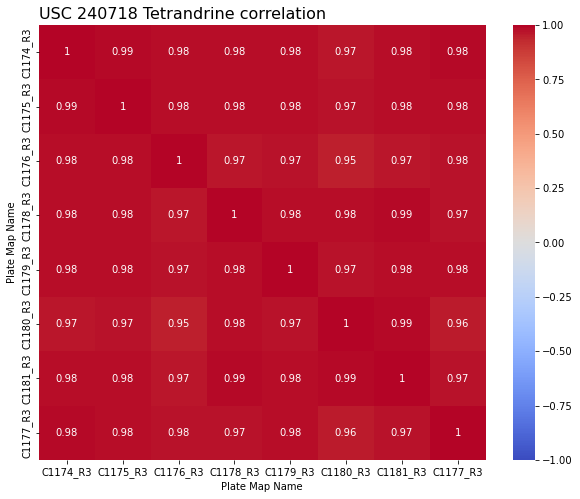

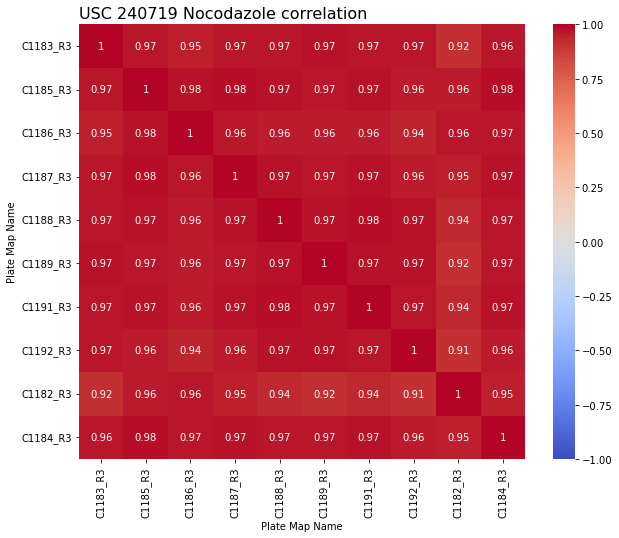

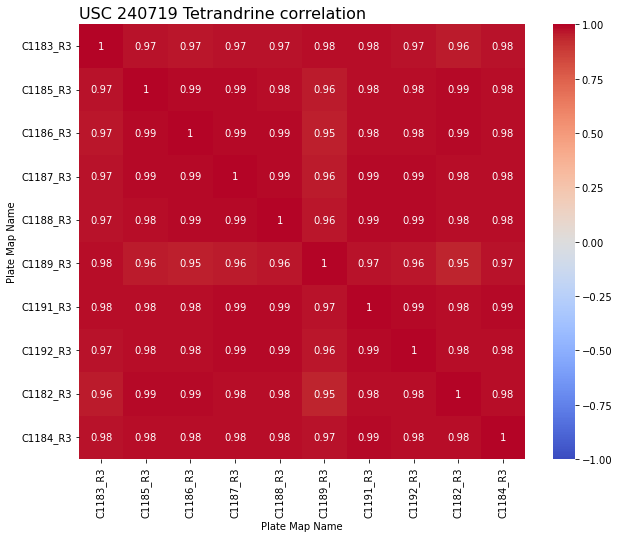

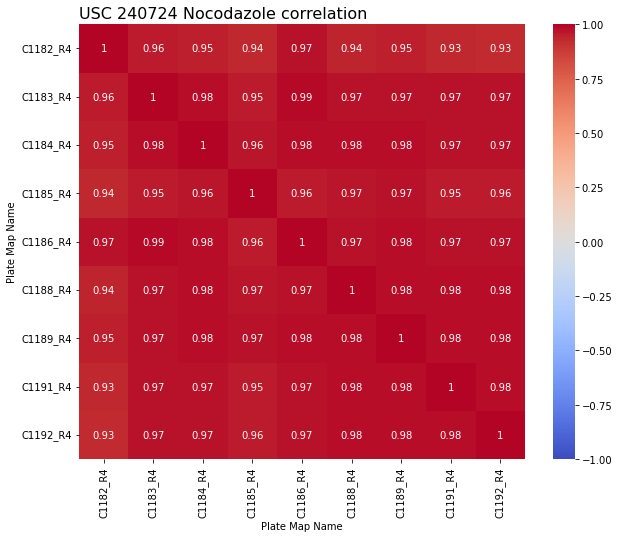

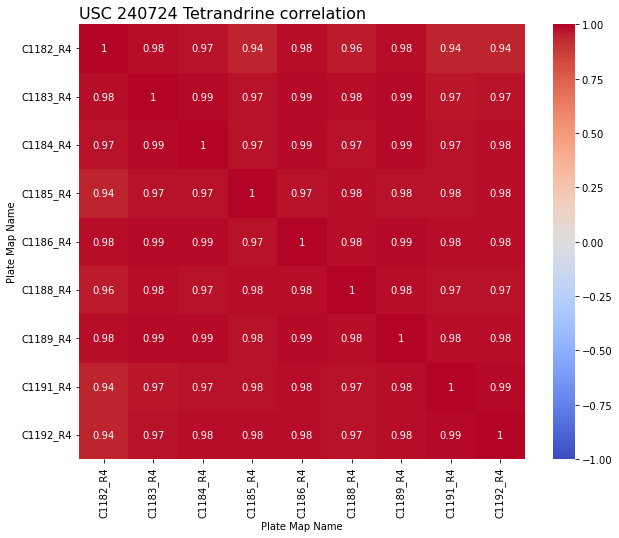

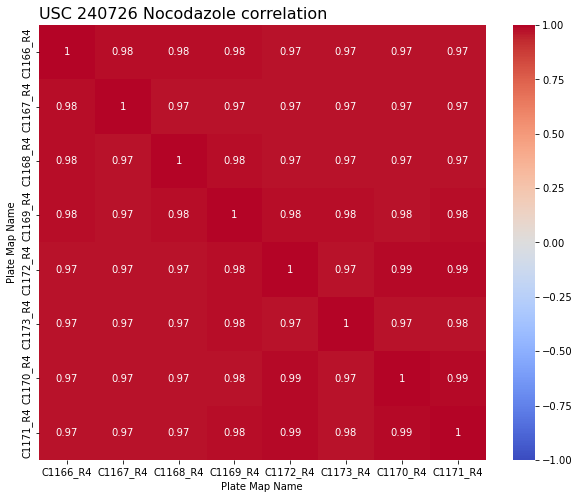

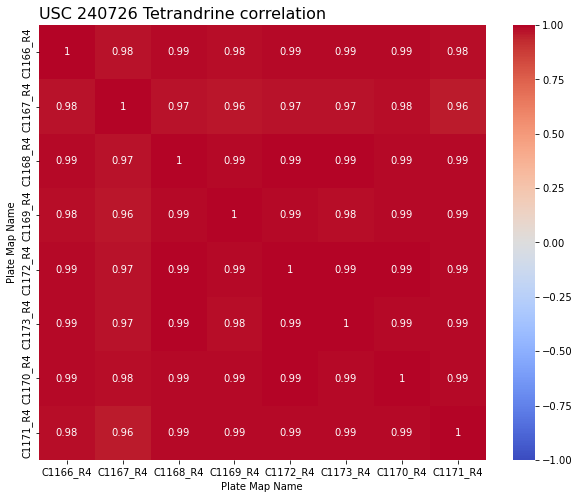

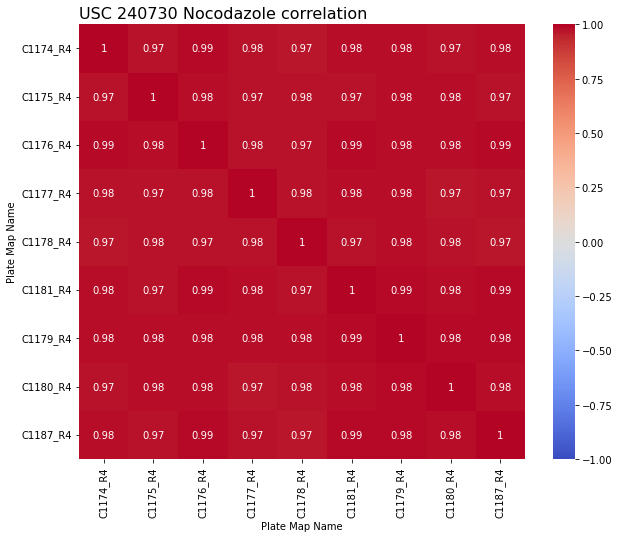

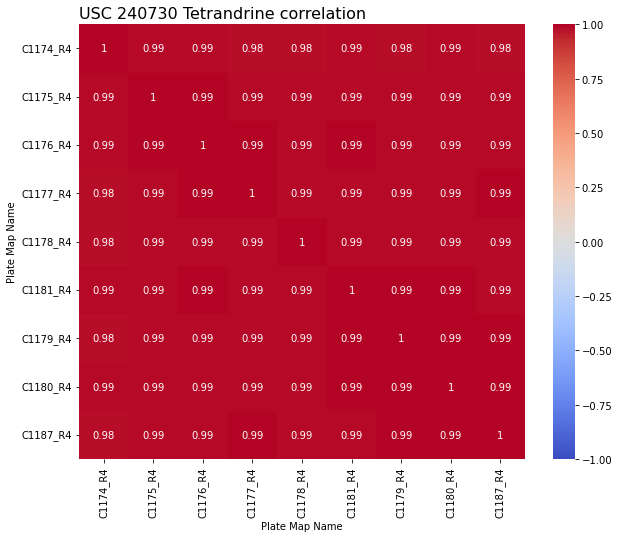

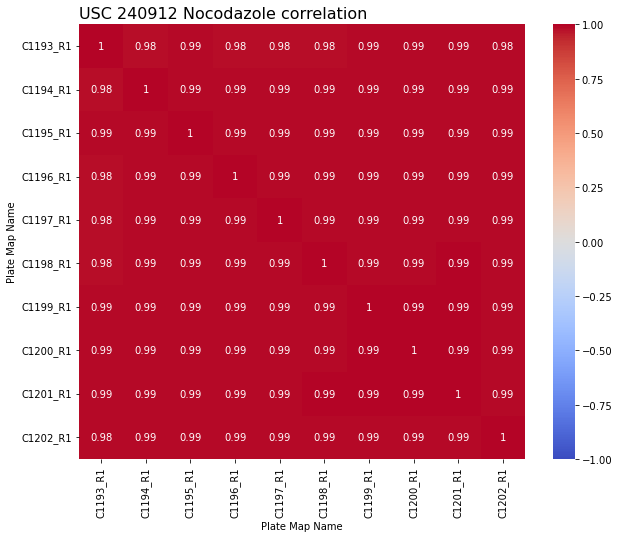

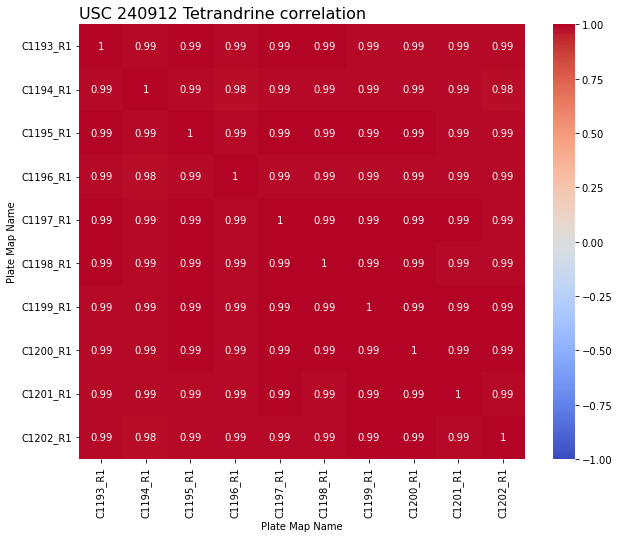

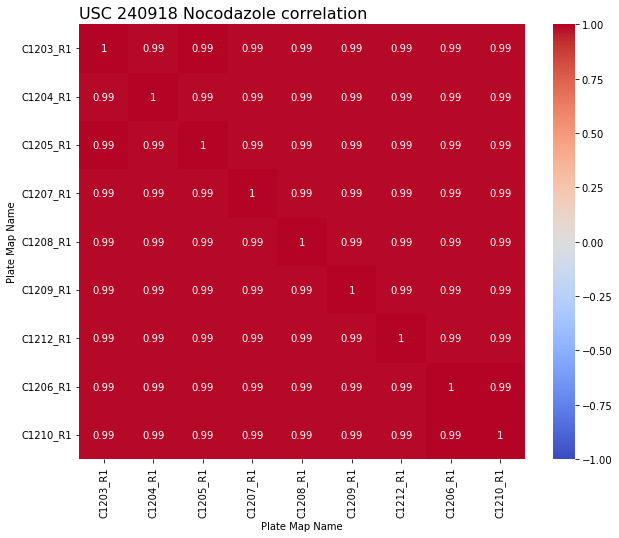

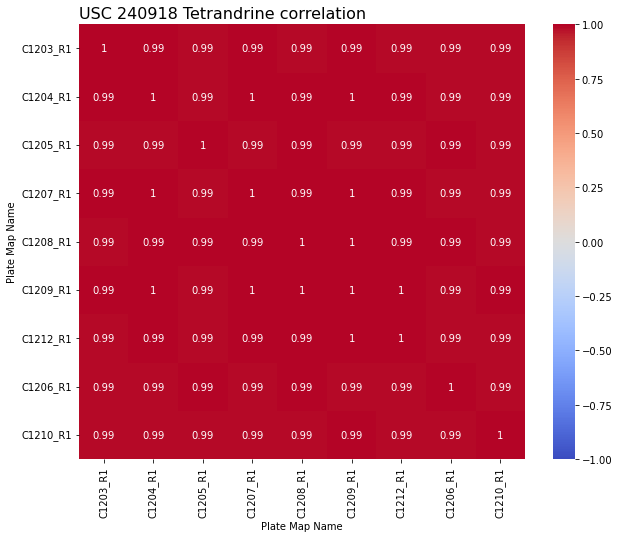

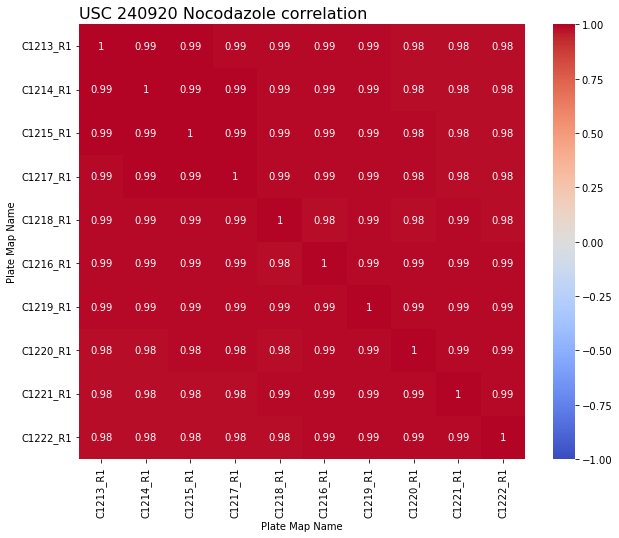

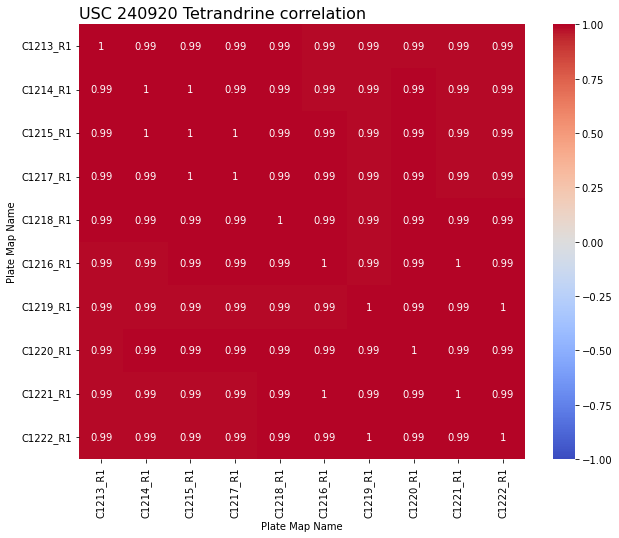

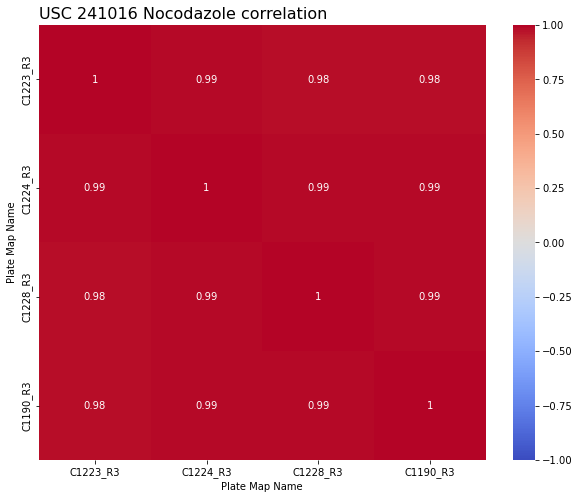

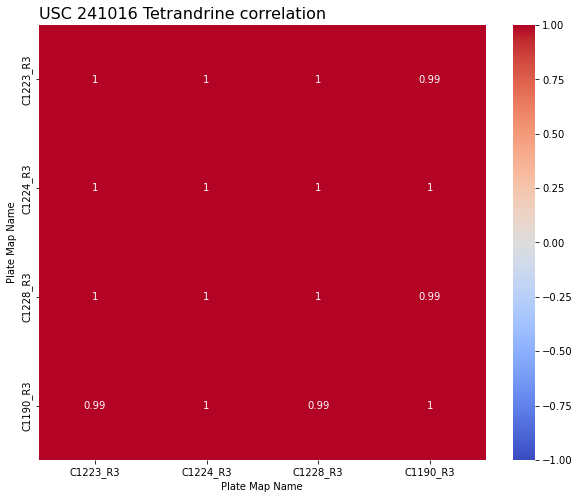

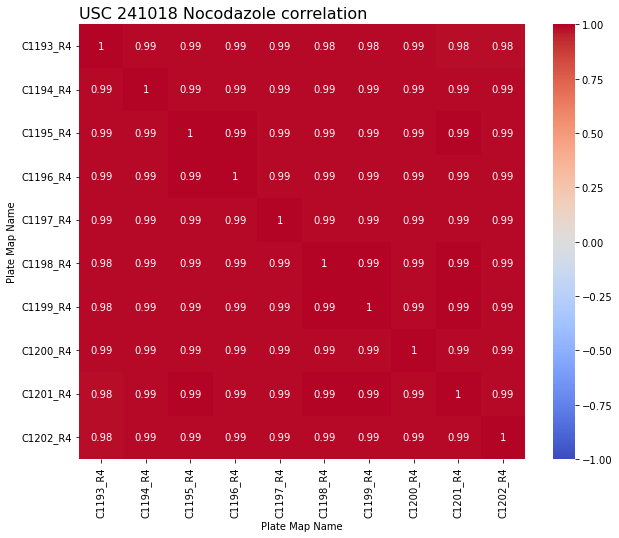

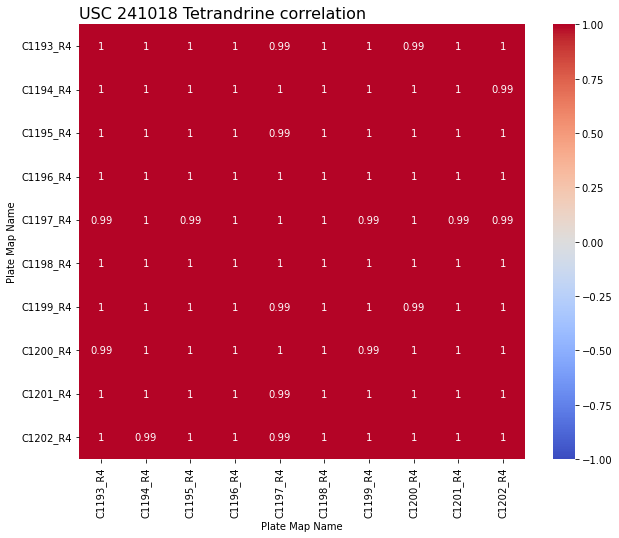

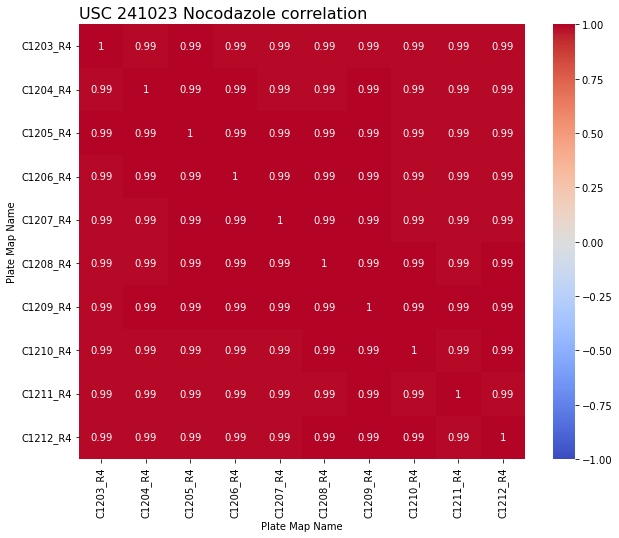

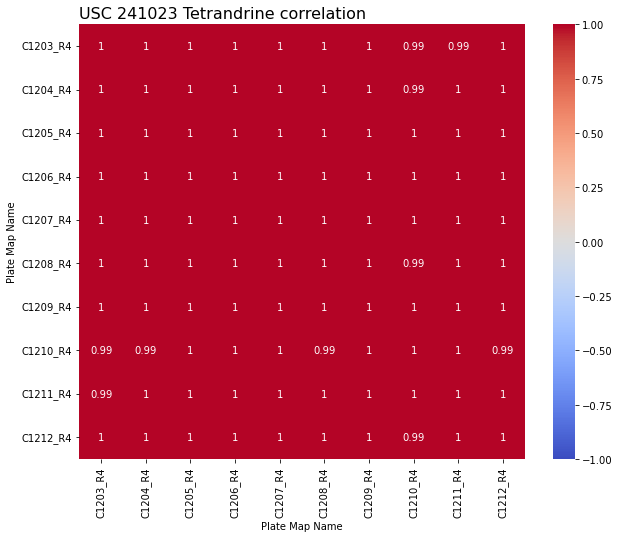

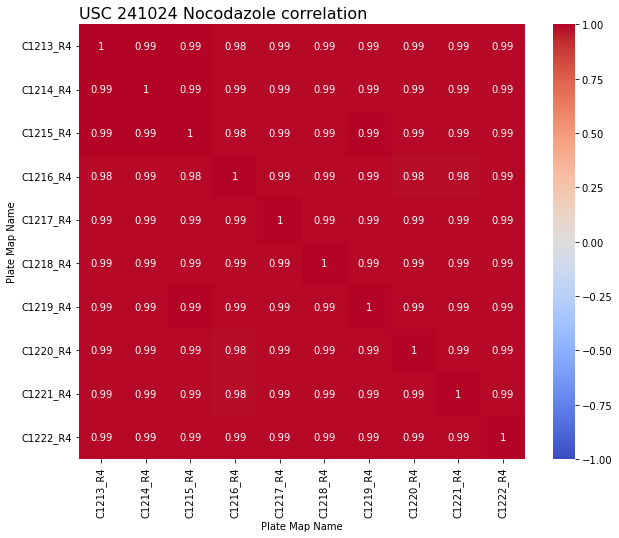

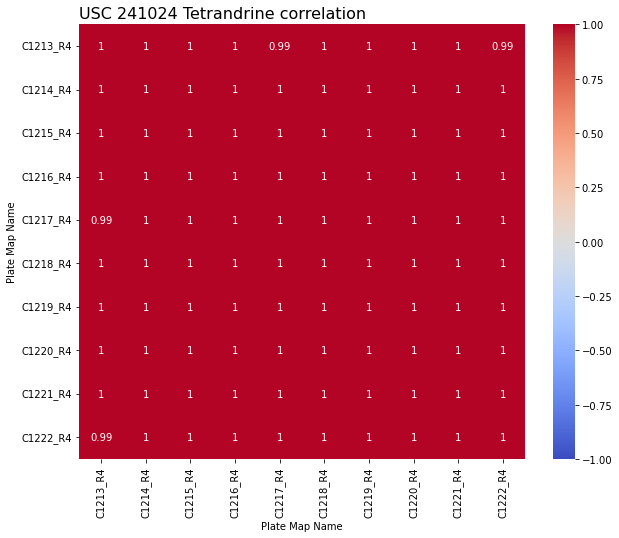

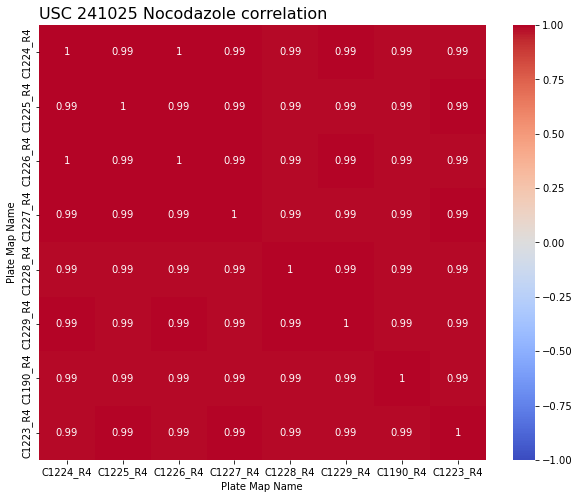

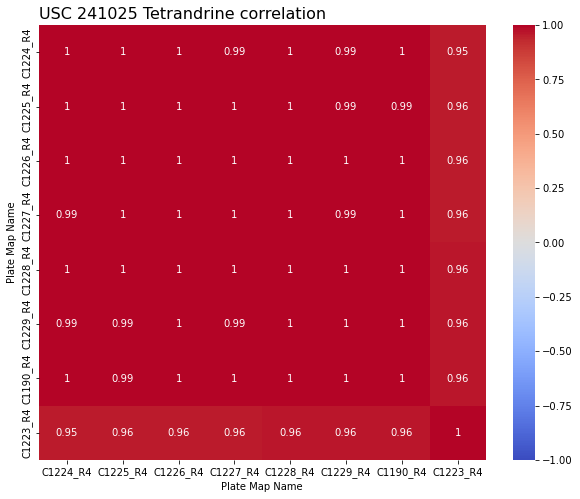

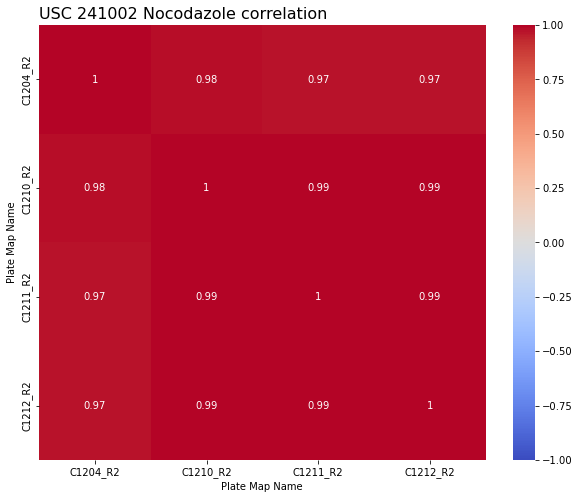

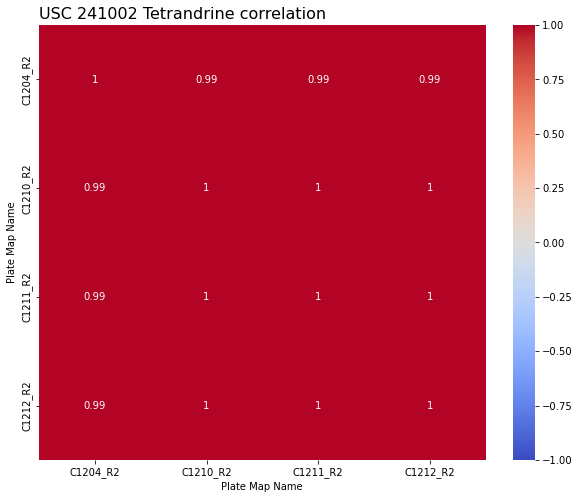

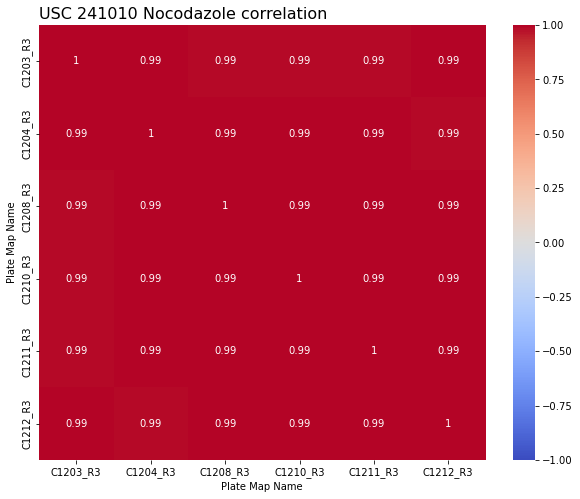

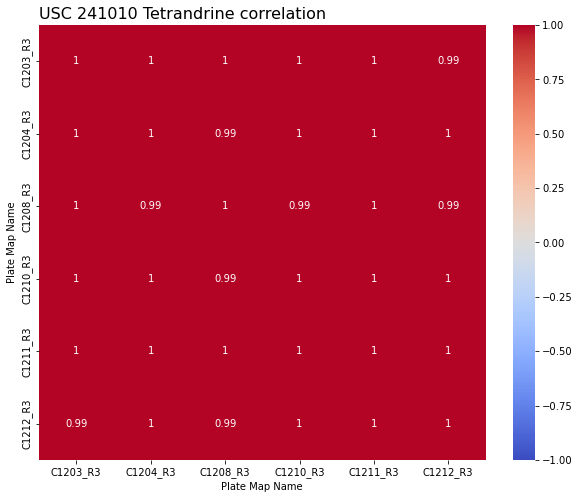

In [14]:
interplate_qc(USC_Data_aggregated, 'USC')

240717
Error: directory cannot be created
Error: directory cannot be created
240718
Error: directory cannot be created
Error: directory cannot be created
240719
Error: directory cannot be created
Error: directory cannot be created
240724
Error: directory cannot be created
Error: directory cannot be created
240911
Error: directory cannot be created
Error: directory cannot be created
240912
Error: directory cannot be created
Error: directory cannot be created
240913
Error: directory cannot be created
Error: directory cannot be created
240918
Error: directory cannot be created
Error: directory cannot be created
240919
Error: directory cannot be created
Error: directory cannot be created
240920
Error: directory cannot be created
Error: directory cannot be created
240926
Error: directory cannot be created


<ipython-input-11-44ab5d09d022>:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 8))


Error: directory cannot be created
240927
Error: directory cannot be created
Error: directory cannot be created
241023
Error: directory cannot be created
Error: directory cannot be created
241024
Error: directory cannot be created
Error: directory cannot be created
241025
Error: directory cannot be created
Error: directory cannot be created
241030
Error: directory cannot be created
Error: directory cannot be created
241031
Error: directory cannot be created
Error: directory cannot be created
241106
Error: directory cannot be created
Error: directory cannot be created
241107
Error: directory cannot be created
Error: directory cannot be created
241108
Error: directory cannot be created
Error: directory cannot be created
241121
Error: directory cannot be created
Error: directory cannot be created
241122
Error: directory cannot be created
Error: directory cannot be created


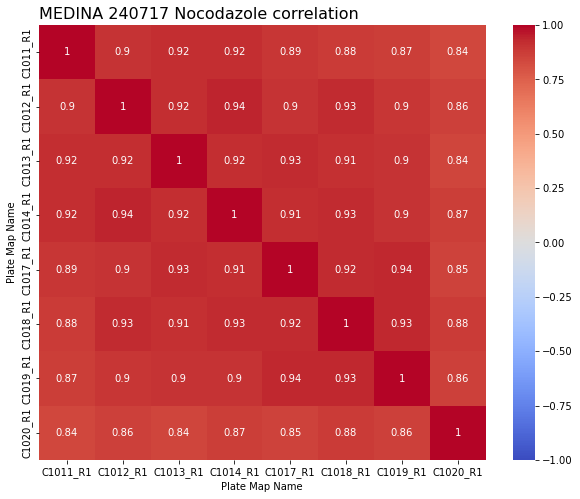

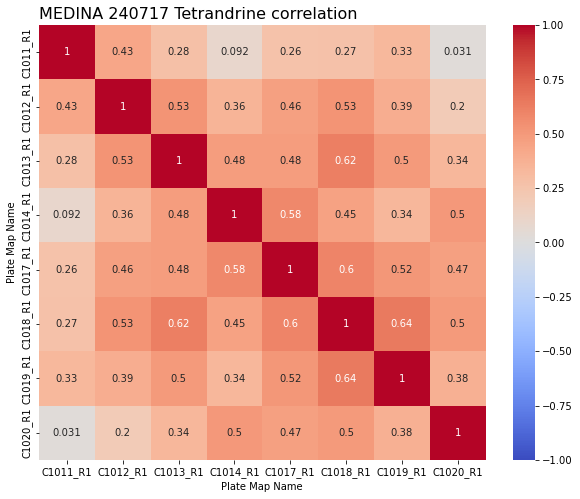

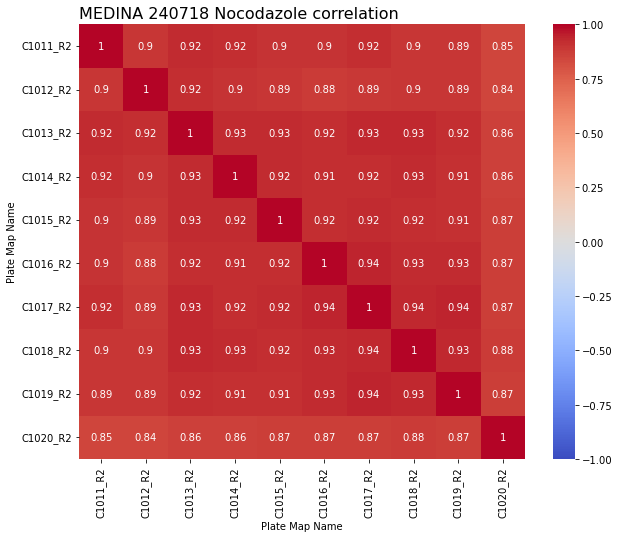

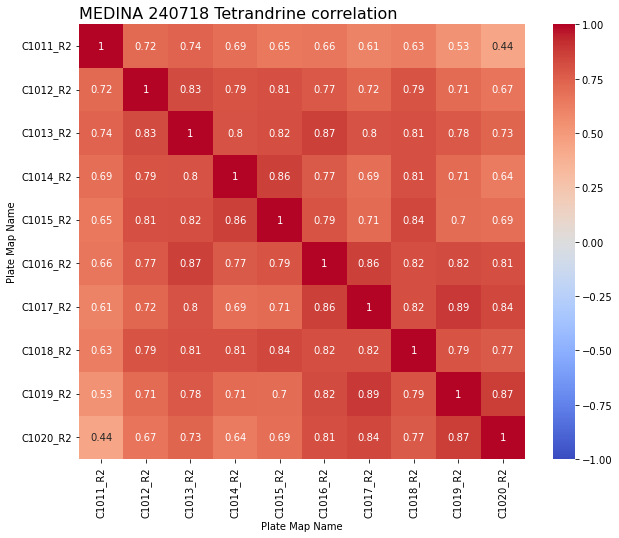

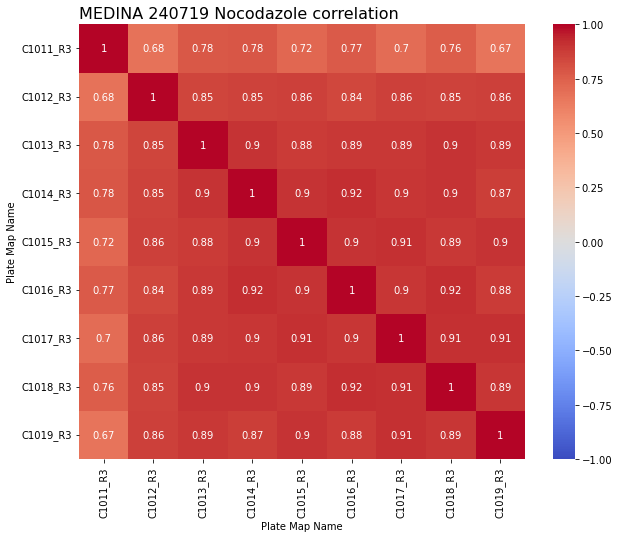

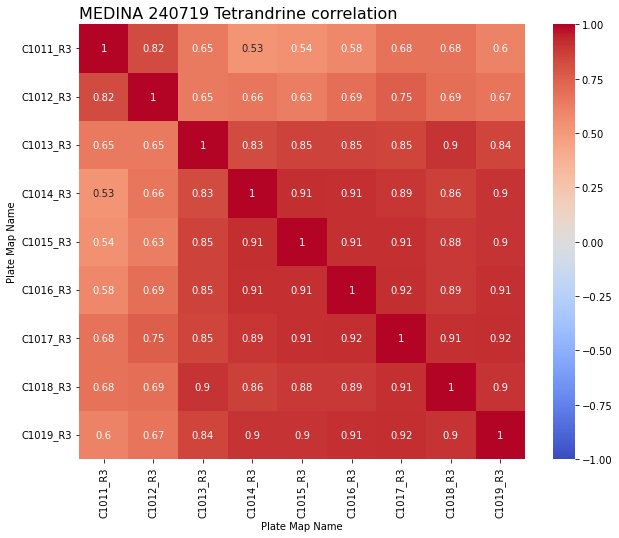

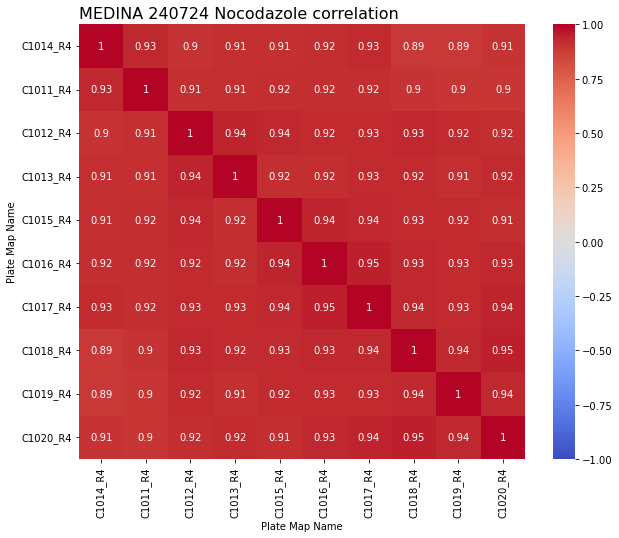

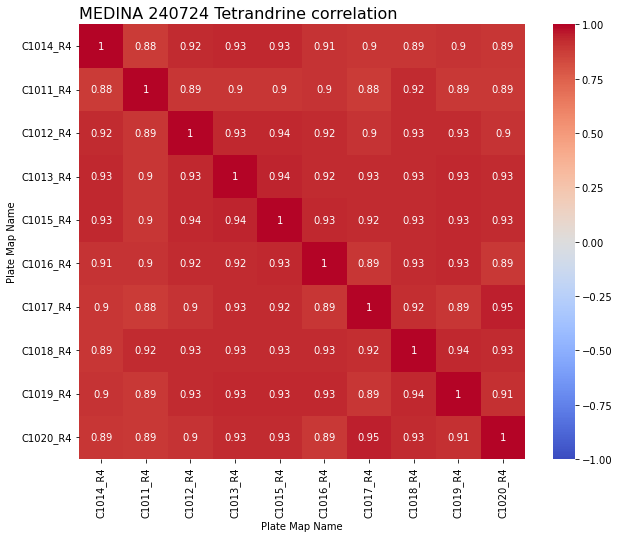

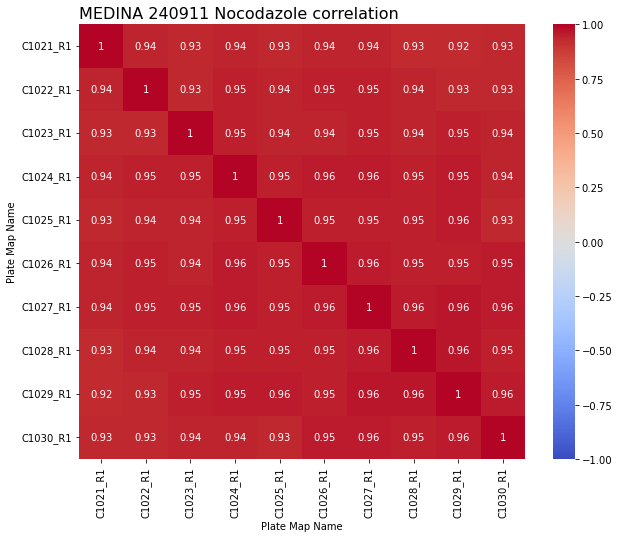

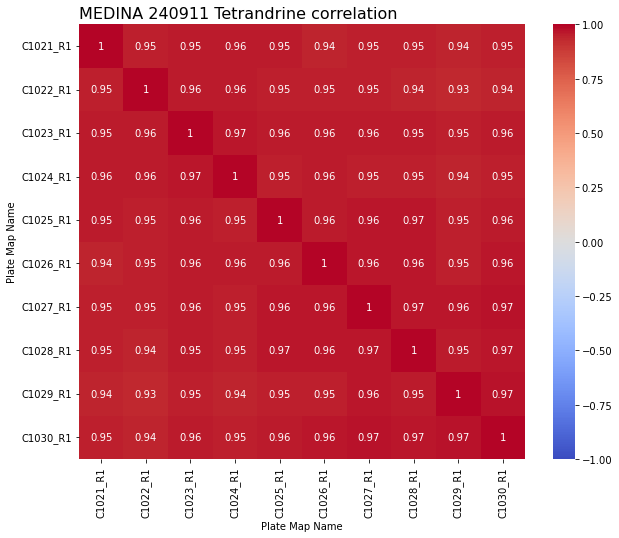

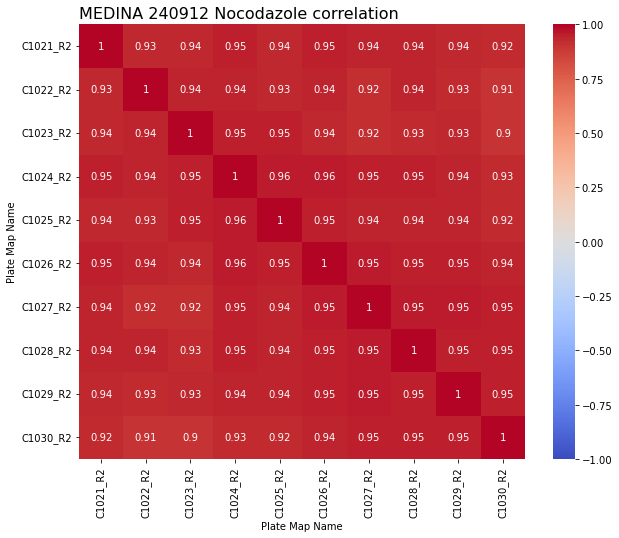

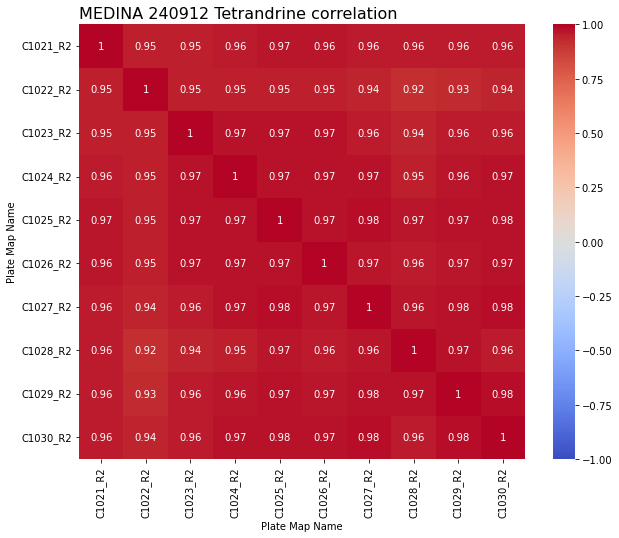

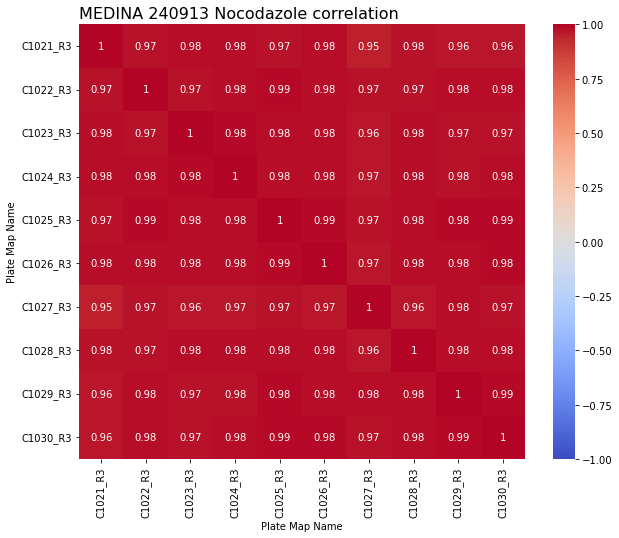

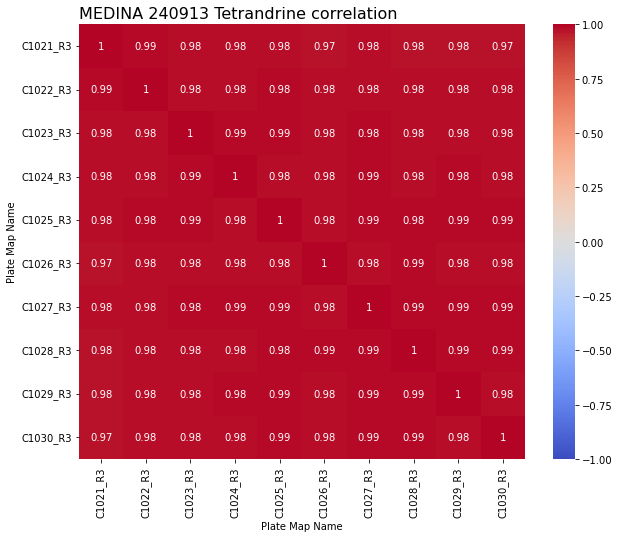

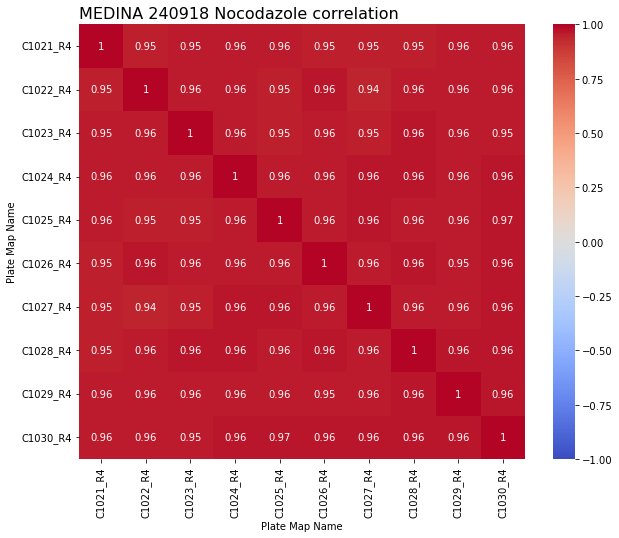

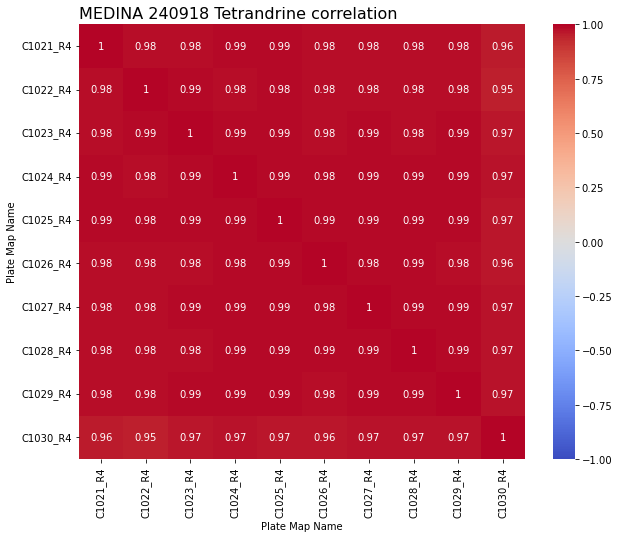

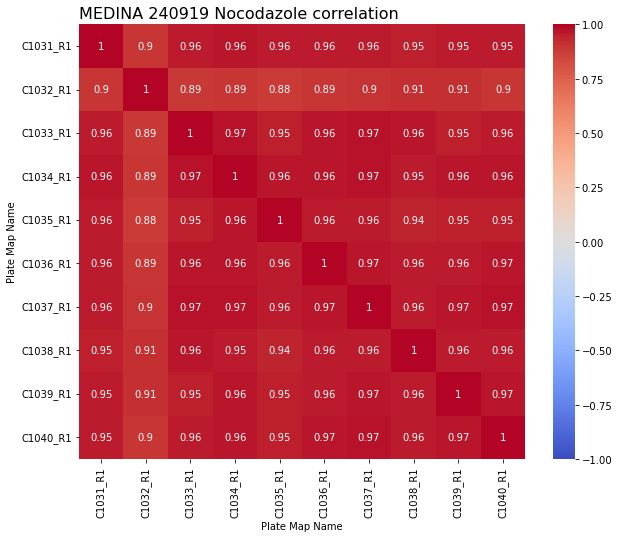

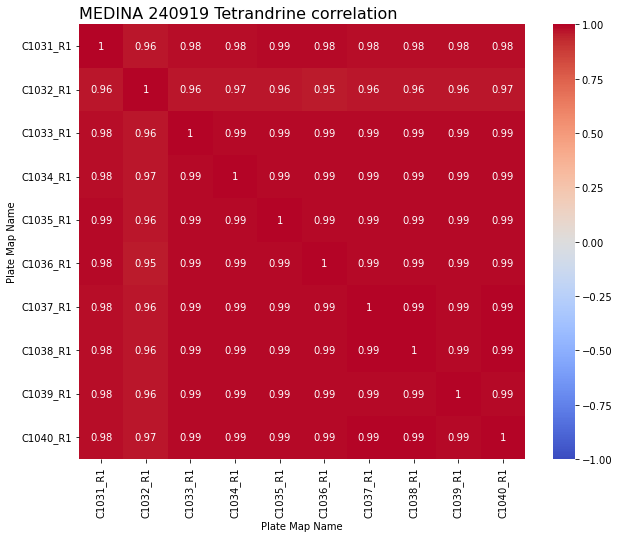

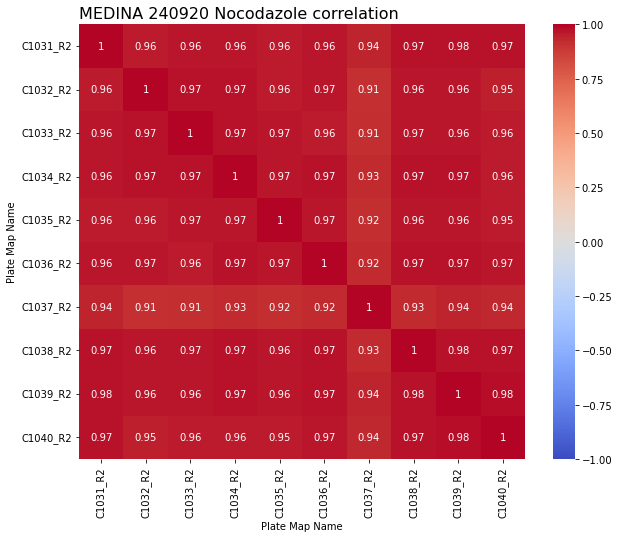

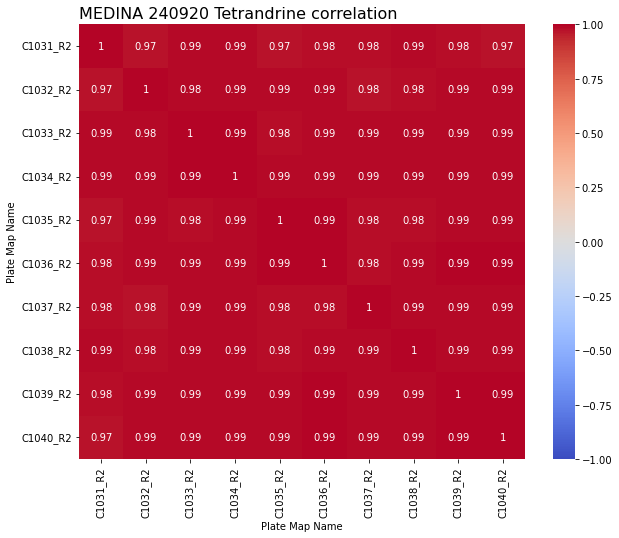

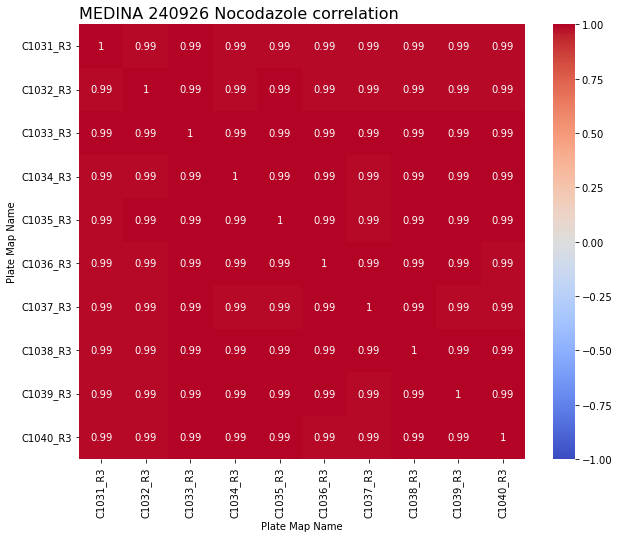

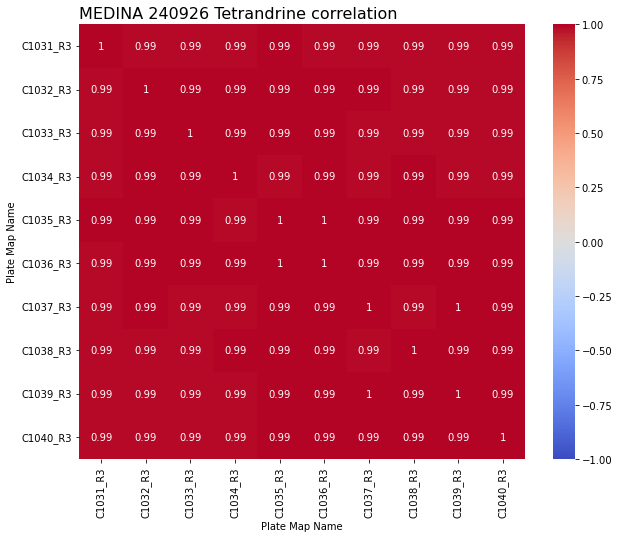

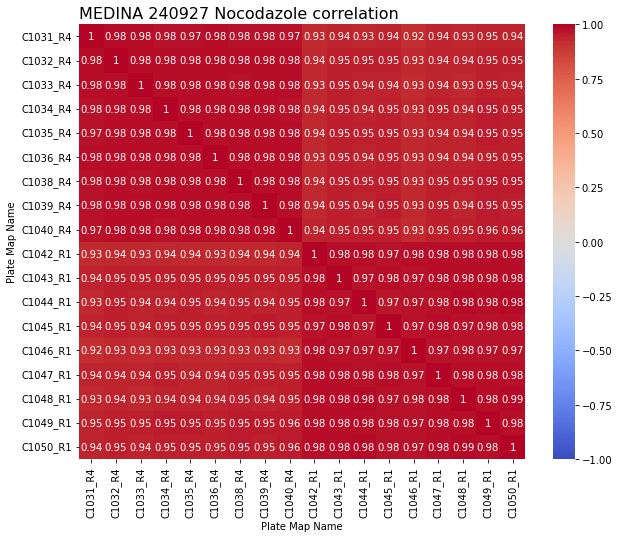

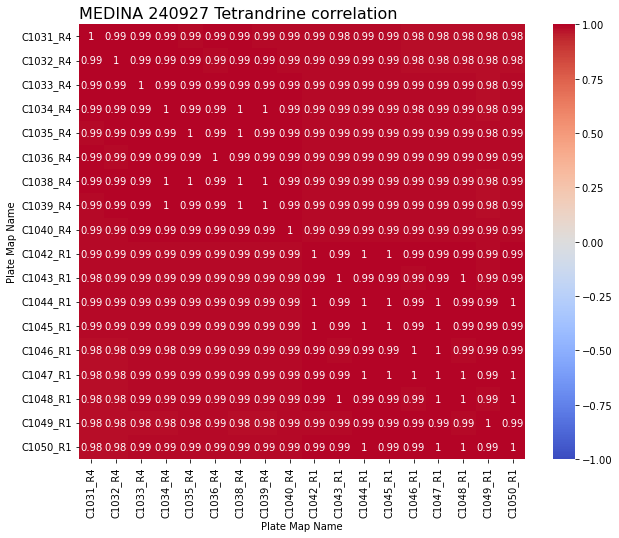

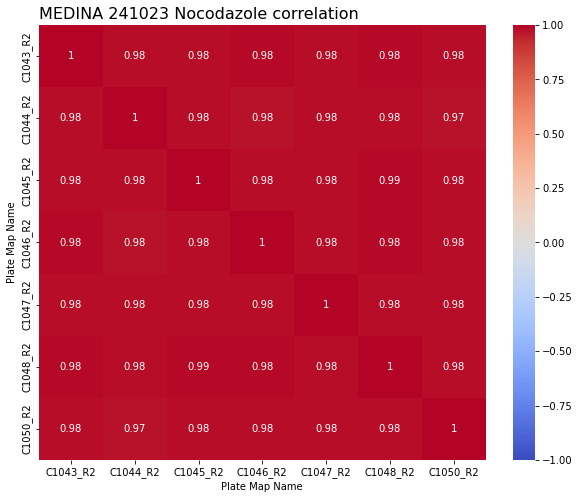

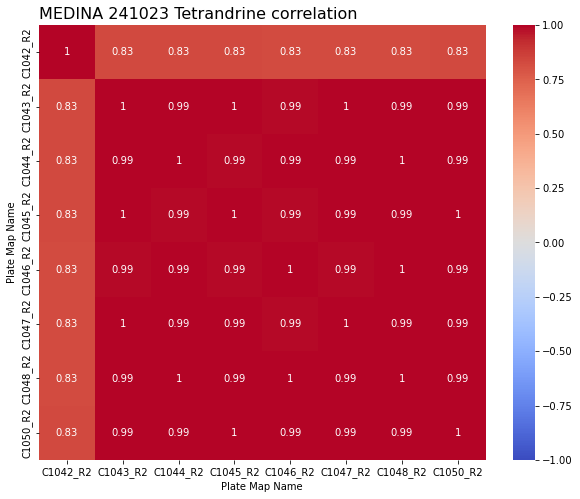

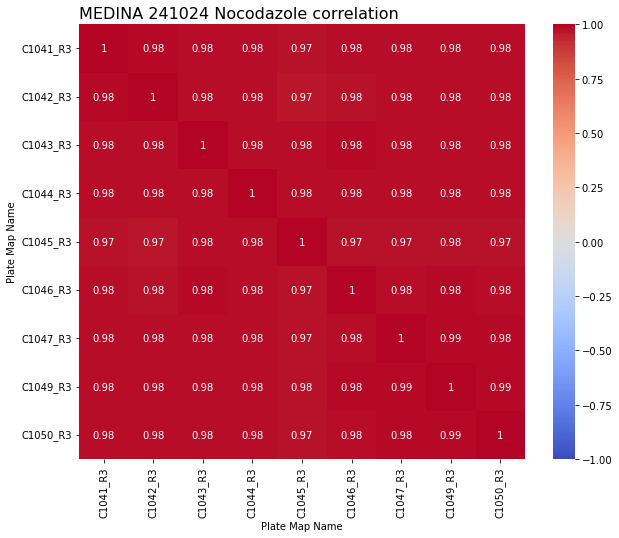

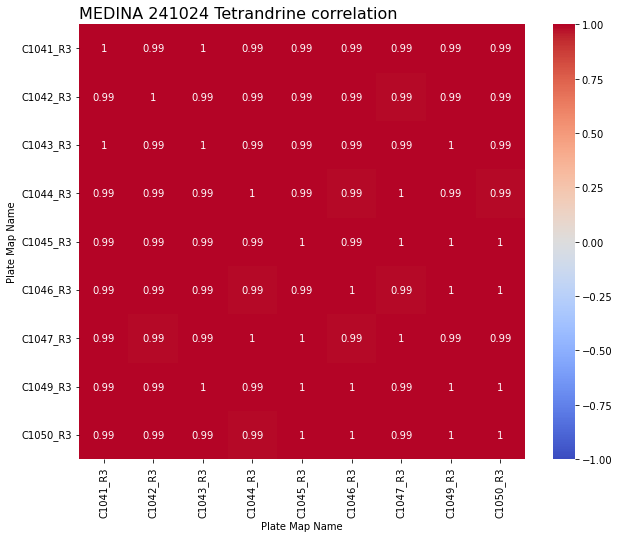

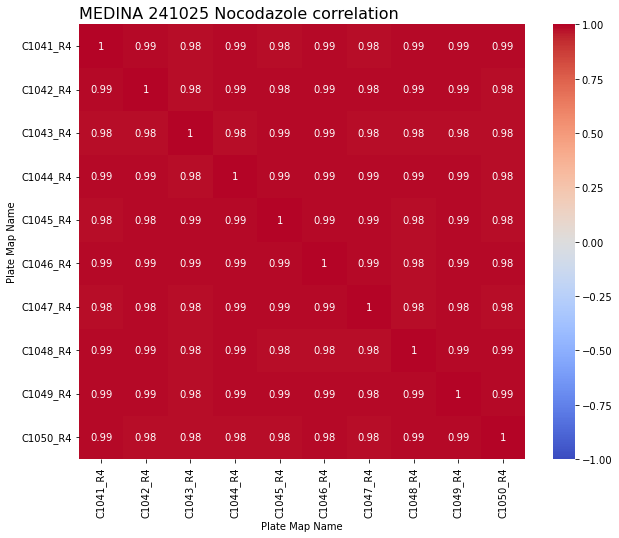

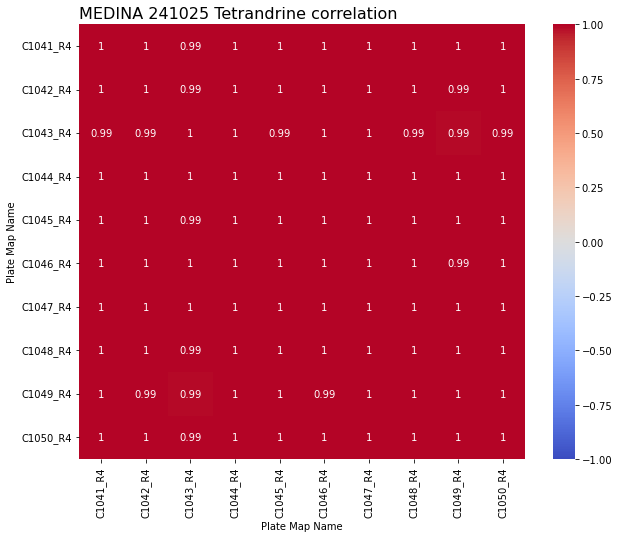

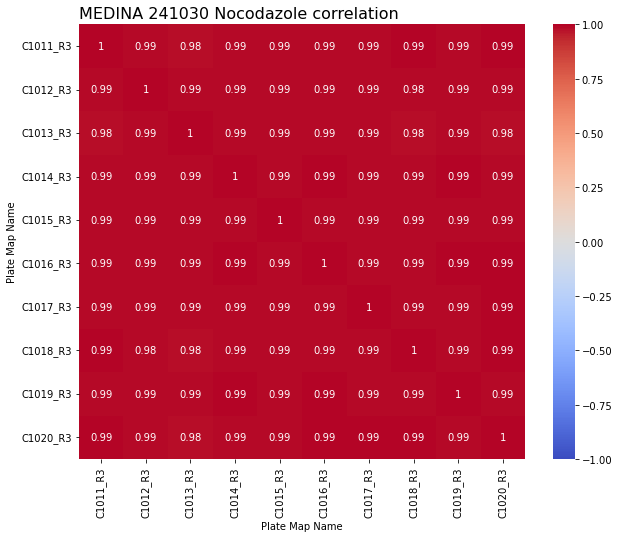

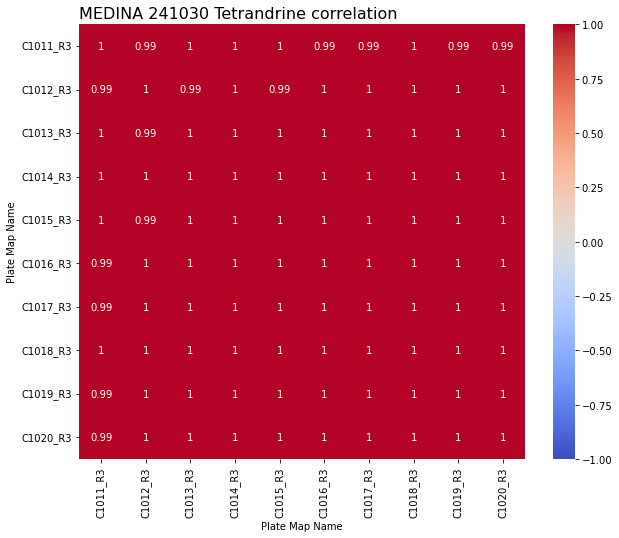

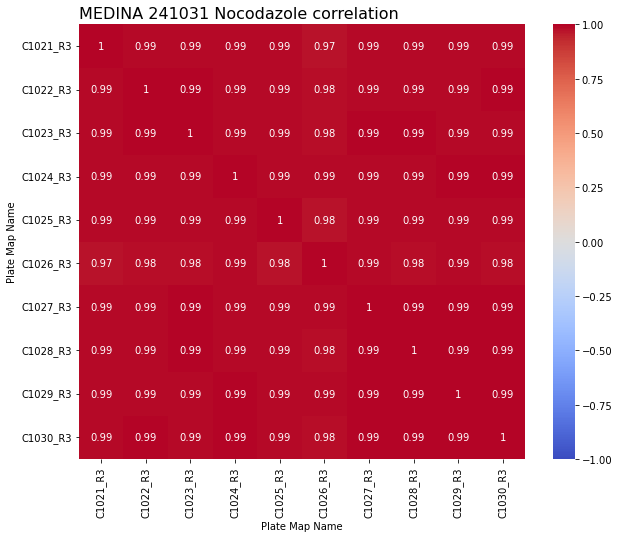

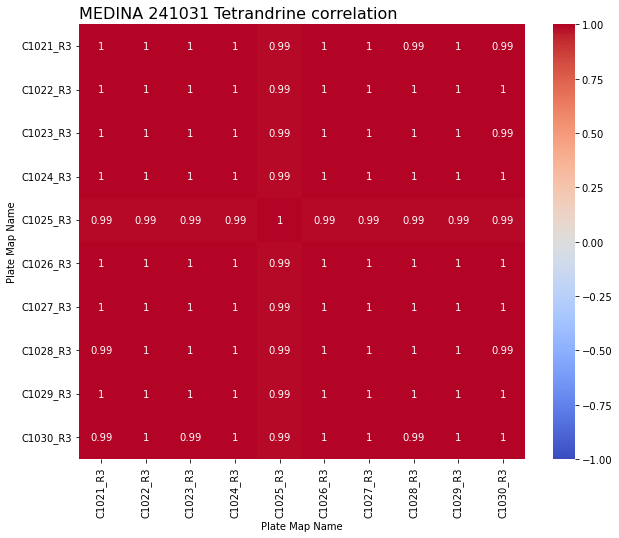

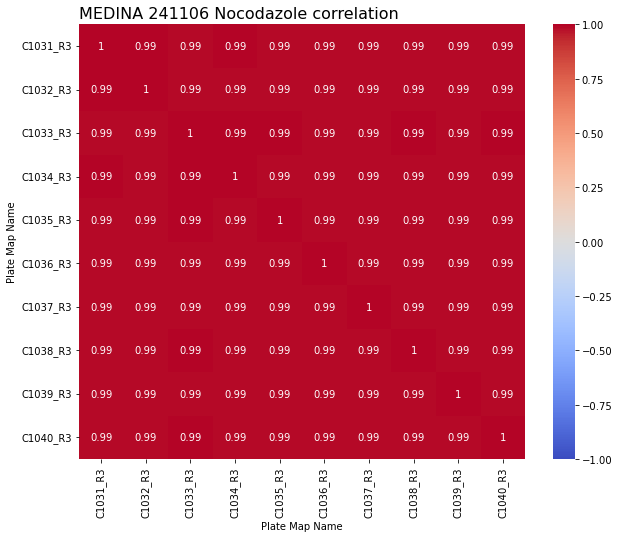

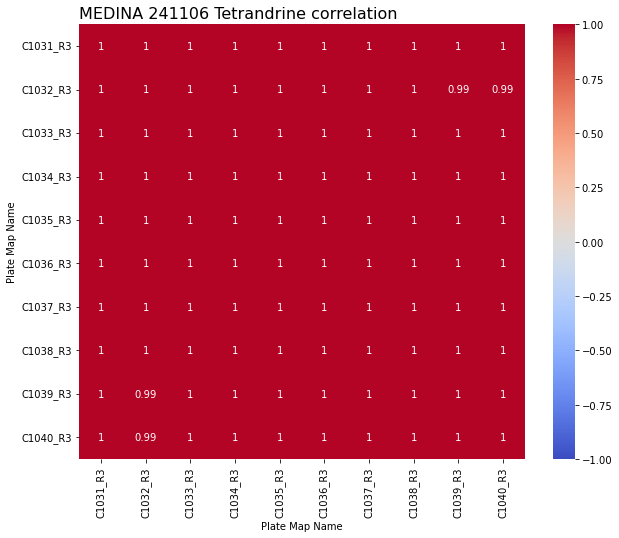

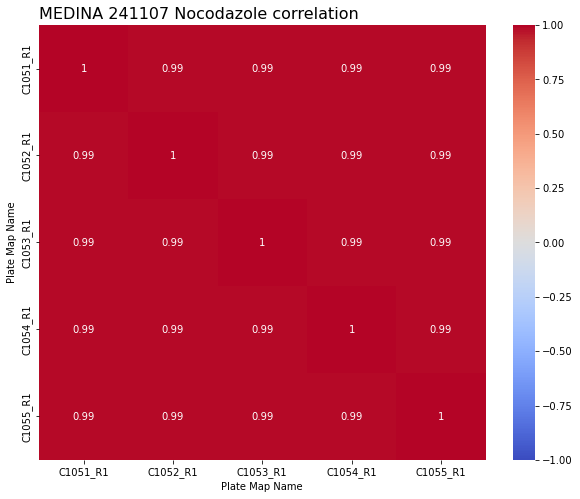

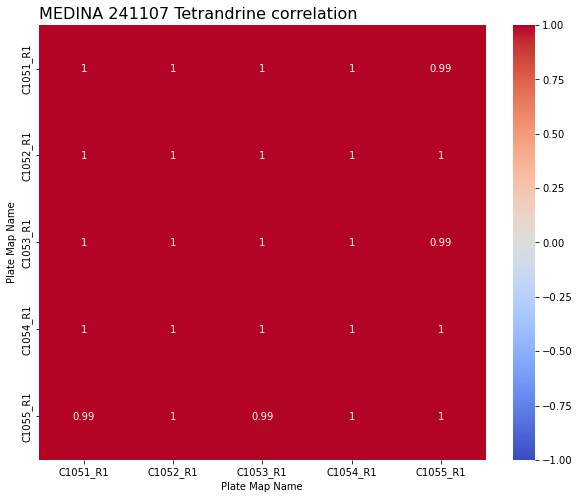

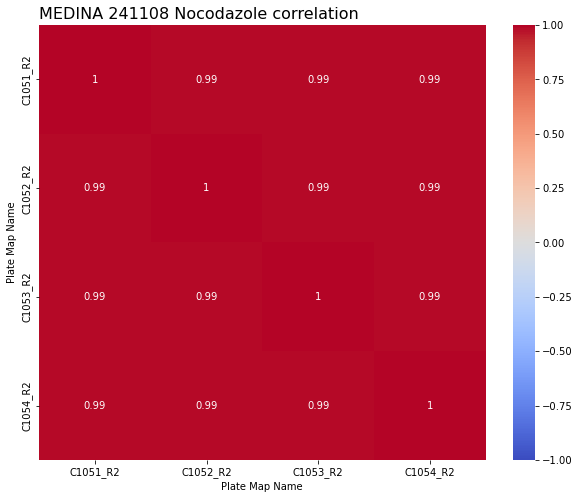

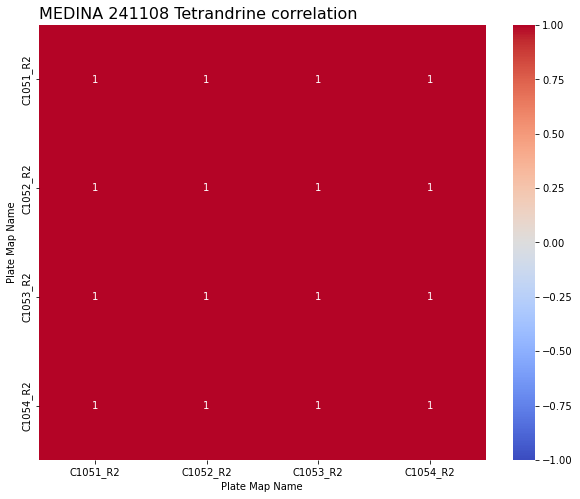

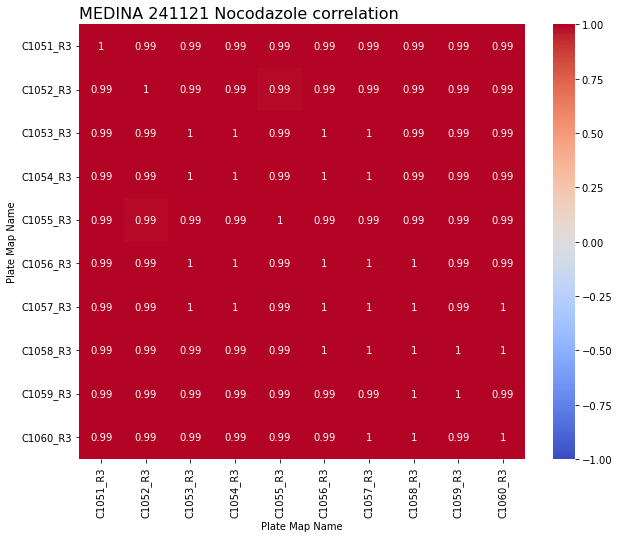

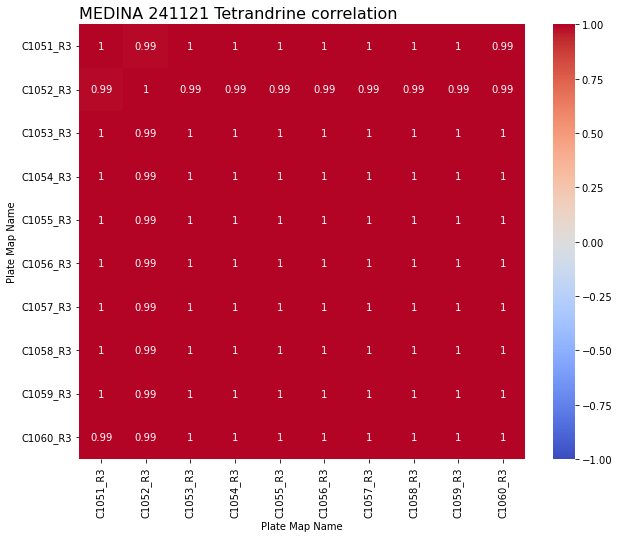

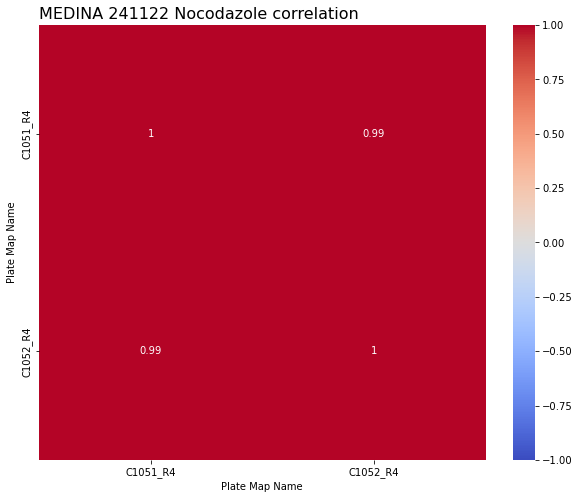

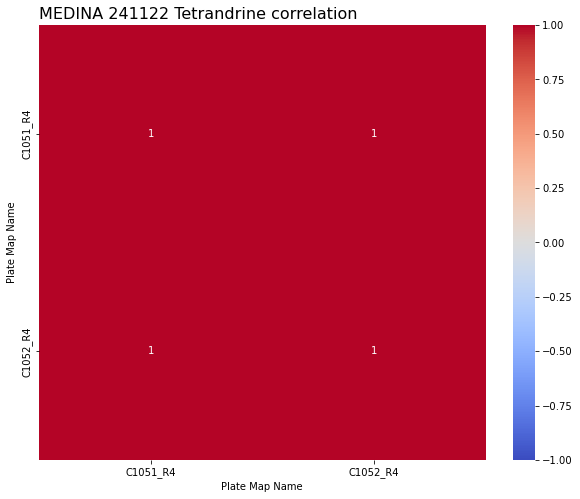

In [15]:
interplate_qc(MEDINA_Data_aggregated, 'MEDINA')

# Compute correlation matrix over different batches

In [16]:
def interbatch_qc(Data_aggregated, source):

    features_columns = CBE.get_feature_vector(Data_aggregated)

    columns_to_drop = [
    'Metadata_source',
    'Metadata_RoughID']

    # Compute the mean profiles for pos. controls put into new table
    source_pos_ctrl = Data_aggregated[Data_aggregated['Metadata_RoughID'].isin(['Tetrandrine','Nocodazole'])]

    source_pos_ctrl_mean = source_pos_ctrl.groupby(['Metadata_staining_date',
                                                    'Metadata_source',
                                                    'Metadata_RoughID'])[features_columns].mean().reset_index()

    ctrl_list = ('Nocodazole', 'Tetrandrine')

    for ctrl in ctrl_list:
        
        source_Data_aggregated_ctrl = source_pos_ctrl_mean.loc[source_pos_ctrl_mean['Metadata_RoughID'] == ctrl].reset_index()

        source_Data_aggregated_ctrl_2 = source_Data_aggregated_ctrl.drop(columns_to_drop, axis=1)
        correlation_ctrl = source_Data_aggregated_ctrl_2.set_index('Metadata_staining_date')
        correlation_ctrl_matrix = correlation_ctrl.T.corr()

        # Plot the correlation matrix using a heatmap
        plt.figure(figsize=(10, 8))
        sns.set(font_scale=0.6)
        sns.heatmap(correlation_ctrl_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        #plt.title(source + " " + str(batch) + " " + ctrl + " correlation", loc = 'left',fontsize= 16)
        plt.xlabel('Imaging date')
        plt.ylabel('Imaging date')

        # Cell Number output for FMP
        figure_path = os.path.join(output_path + os.sep + source)  

        try:
            os.mkdir(figure_path)
            
        except OSError as error:
            
            print("Error: directory cannot be created") 

        plt.savefig(figure_path + os.sep + source + '_' + ctrl + '_InterBatchCorr.pdf', format='pdf', bbox_inches = "tight")



Error: directory cannot be created
Error: directory cannot be created


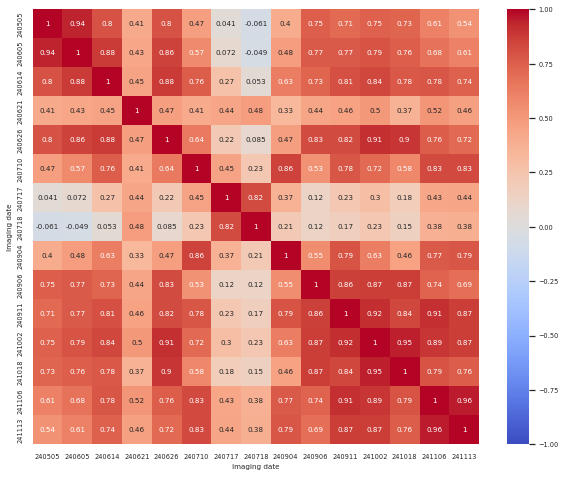

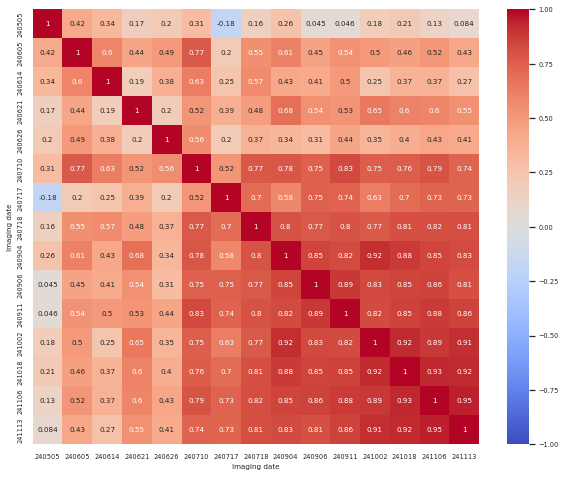

In [17]:
interbatch_qc(FMP_Data_aggregated, 'FMP')

Error: directory cannot be created
Error: directory cannot be created


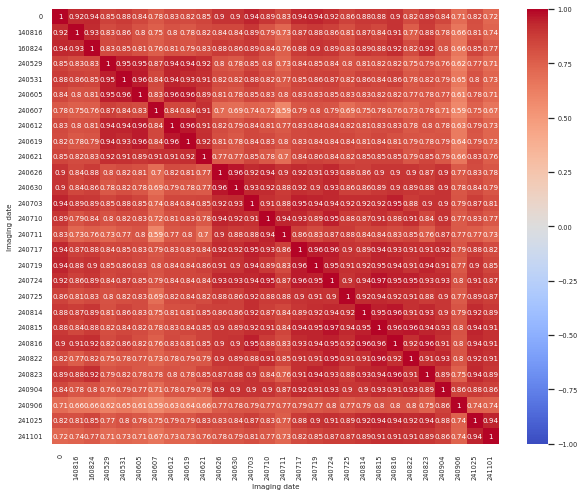

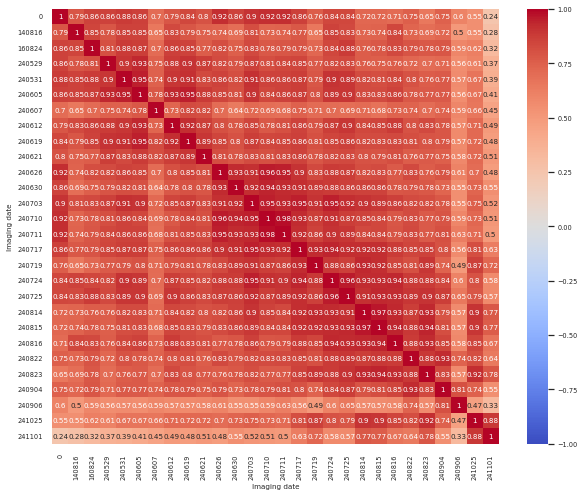

In [18]:
interbatch_qc(IMTM_Data_aggregated, 'IMTM')

Error: directory cannot be created
Error: directory cannot be created


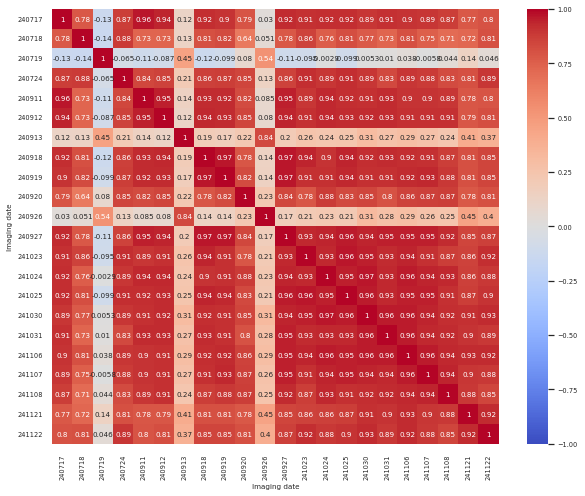

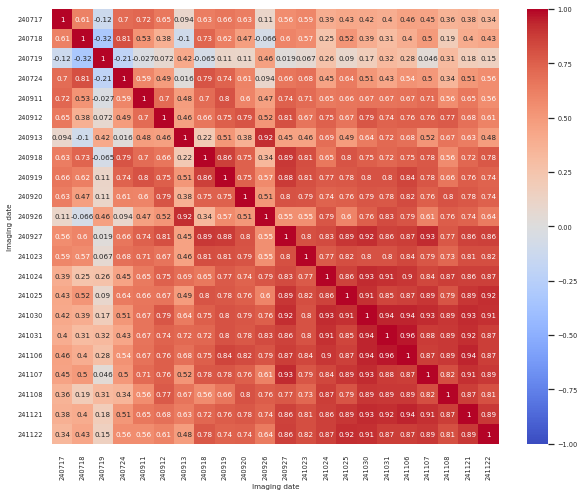

In [19]:
interbatch_qc(MEDINA_Data_aggregated, 'MEDINA')

Error: directory cannot be created
Error: directory cannot be created


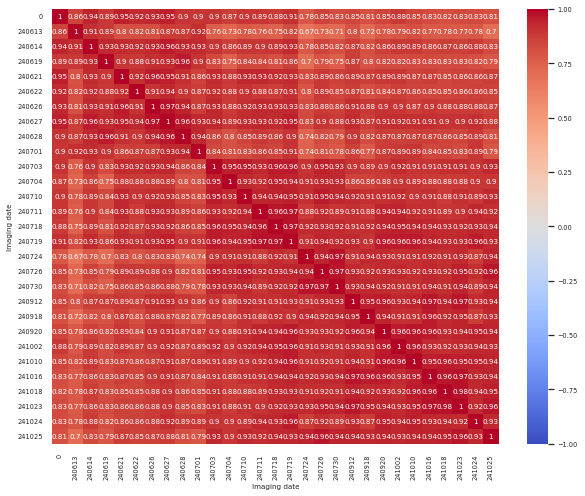

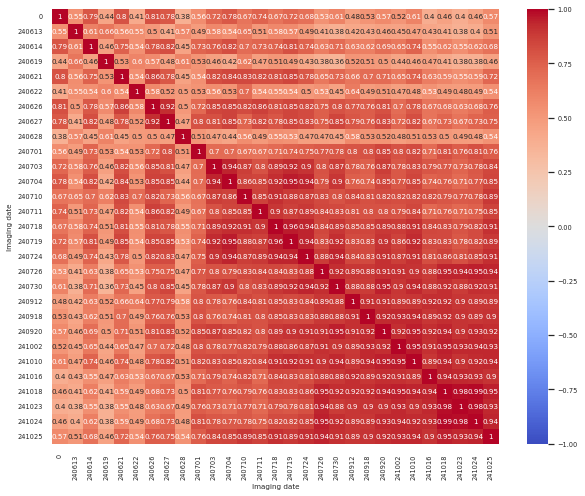

In [20]:
interbatch_qc(USC_Data_aggregated, 'USC')